### Context

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

### Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

### Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

#### Data Dictionary:
- Booking_ID: the unique identifier of each booking
- no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- no_of_week_nights: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer:
- Not Selected – No meal plan selected
- Meal Plan 1 – Breakfast
- Meal Plan 2 – Half board (breakfast and one other meal)
- Meal Plan 3 – Full board (breakfast, lunch, and dinner)
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- booking_status: Flag indicating if the booking was canceled or not.

In [ ]:
# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#to build model for prediction
import statsmodels.api as SM
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Library to split data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
f1_score,
accuracy_score,
recall_score,
precision_score,
confusion_matrix,
roc_auc_score,
precision_recall_curve,
roc_curve,
make_scorer,
confusion_matrix,
classification_report,
)

from sklearn.metrics import ConfusionMatrixDisplay

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INNHotelsGroup.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

***Notes*** :
* There are no null values and we have 36275 observations and 19 columns
* There are 14 numerical variables and 5 categorical variables

In [ ]:
data.shape

(36275, 19)

***Notes*** :
* We have 36275 observations and 18 columns

In [ ]:
data.describe(include =np.number).T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

In [ ]:
data.describe(exclude =np.number).T

count unique           top   freq
Booking_ID           36275  36275      INN00001      1
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

***Notes*** :
* most of the times the bookings are made for 2 Adults
* Most of the bookings are made without children Although the max no. of children includes 10.
* 50 % of the bookings are made including one weekend where as the week nights is 2. However there are outliers
* Max opted Meal Plan is Meal Plan 1.
* 75% of the bookings are made without opting for car_parking_space.
* Commonly opted room_type_reserved is Room_Type 1.
* 50% of the lead time is 57 days
* Most of the bookings are made for 2018 where as the max arrival month is Oct
* Most of te bookings are made via  online
* Most of the guests are not repeated guests
* Most of the times there were no previous cancellations however there are outliers.
* Average price of the rooms falls between 99 and 103. Min is 80 and Max is 540
* 50% of the guests not made special requests however there are exceptions
* Most of the bookings are not-cancelled
  

### Checking for null values in the data


In [ ]:
data.isnull().values.any()

False

In [ ]:
data.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* We don't have missing values in the data.

In [ ]:
df1=data.copy()

In [ ]:
df1[df1.duplicated()==True].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There are no duplicates in the data set

In [ ]:
df1.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
# view what are the values in object data types
cat_columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
for i in cat_columns:
    print(df1[i].value_counts())
    print("-" * 50)


type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
--------------------------------------------------
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
--------------------------------------------------
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
--------------------------------------------------
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64
--------------------------------------------------


### Exploratory Data Analysis (EDA)

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

# creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Univariate analysis

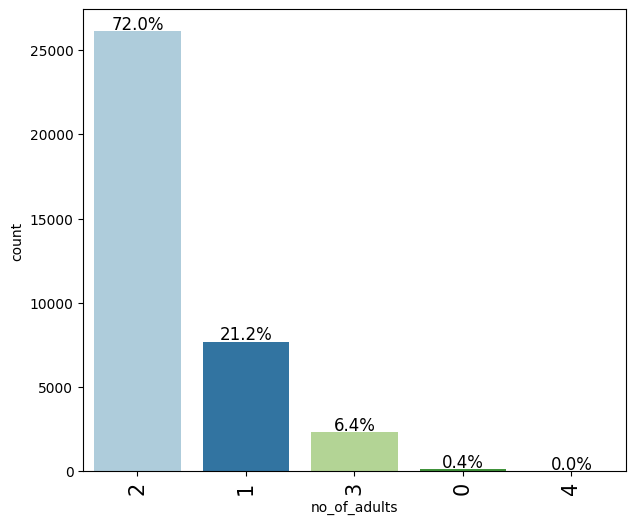

In [ ]:
labeled_barplot(df1, "no_of_adults", perc=True)

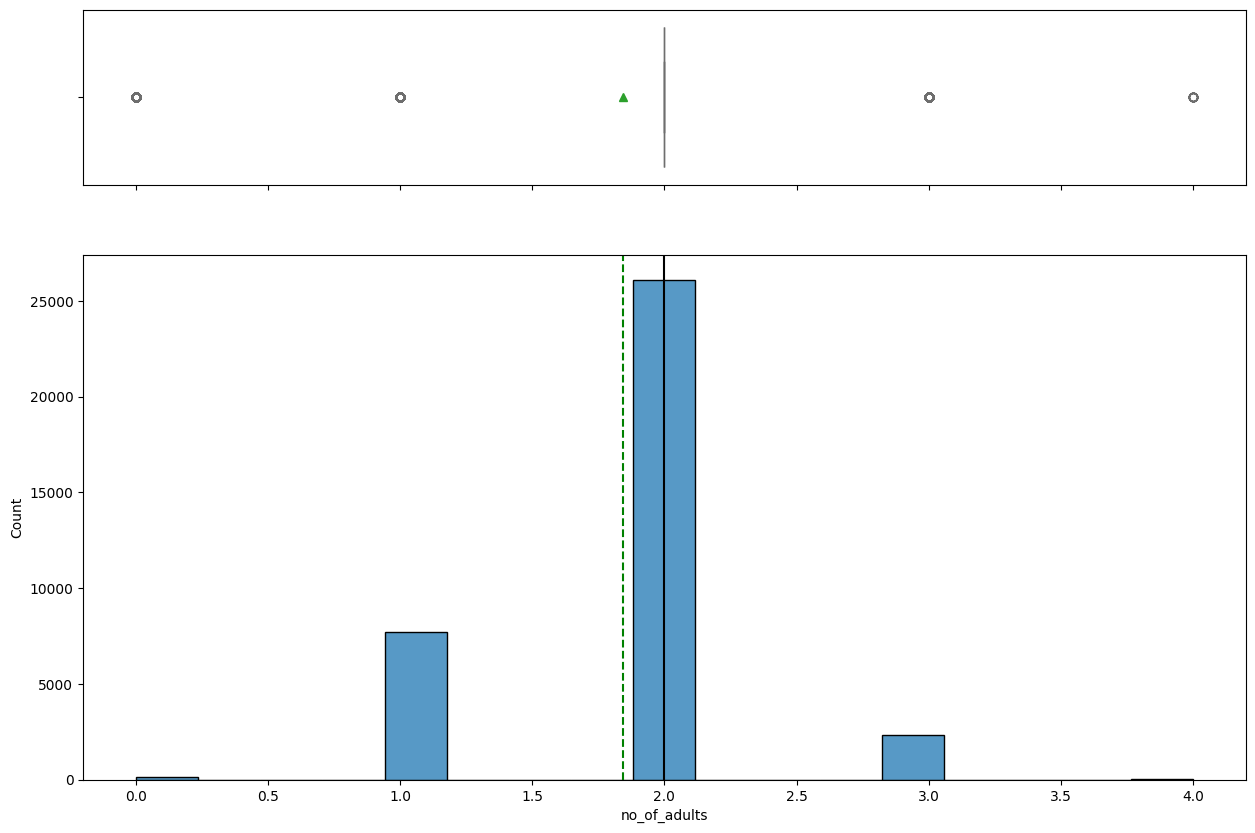

In [ ]:
histogram_boxplot(df1,"no_of_adults")

In [ ]:
df1[df1['no_of_adults']==0]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
32      INN00033             0               2                     0   
287     INN00288             0               2                     2   
653     INN00654             0               2                     1   
937     INN00938             0               2                     0   
954     INN00955             0               2                     1   
1395    INN01396             0               1                     2   
1660    INN01661             0               2                     0   
2308    INN02309             0               2                     0   
2331    INN02332             0               2                     2   
2336    INN02337             0               2                     1   
2527    INN02528             0               2                     0   
2643    INN02644             0               2                     0   
2694    INN02695             0               2                     0   
2873    INN02874             0               2                     0   
2964    INN02965             0               2                     1   
2997    INN02998             0               2                     0   
3250    INN03251             0               2                     0   
3477    INN03478             0               2                     0   
3702    INN03703             0               2                     1   
3716    INN03717             0               2                     0   
3930    INN03931             0               2                     2   
3973    INN03974             0               2                     0   
3975    INN03976             0               2                     2   
4401    INN04402             0               2                     2   
4612    INN04613             0               2                     1   
4765    INN04766             0               2                     1   
4815    INN04816             0               2                     0   
4899    INN04900             0               2                     0   
5295    INN05296             0               2                     0   
5303    INN05304             0               2                     0   
5838    INN05839             0               2                     2   
6226    INN06227             0               2                     2   
6405    INN06406             0               2                     0   
6591    INN06592             0               2                     2   
6682    INN06683             0               2                     2   
6694    INN06695             0               2                     2   
7700    INN07701             0               2                     2   
7775    INN07776             0               2                     1   
7832    INN07833             0               2                     1   
8464    INN08465             0               2                     2   
9462    INN09463             0               2                     0   
10814   INN10815             0               2                     1   
10822   INN10823             0               2                     0   
11025   INN11026             0               2                     1   
11031   INN11032             0               2                     2   
11102   INN11103             0               2                     3   
11571   INN11572             0               2                     0   
11605   INN11606             0               2                     2   
11649   INN11650             0               2                     0   
11683   INN11684             0               2                     0   
12411   INN12412             0               2                     1   
12470   INN12471             0               2                     2   
12541   INN12542             0               2                     0   
12740   INN12741             0               2                     2   
12874   INN12875             0               2

As no Children can book hotels without an adult, dropping the 139 records mentioned above.

In [ ]:
df = df1[df1['no_of_adults'] != 0]

In [ ]:
df.shape

(36136, 19)

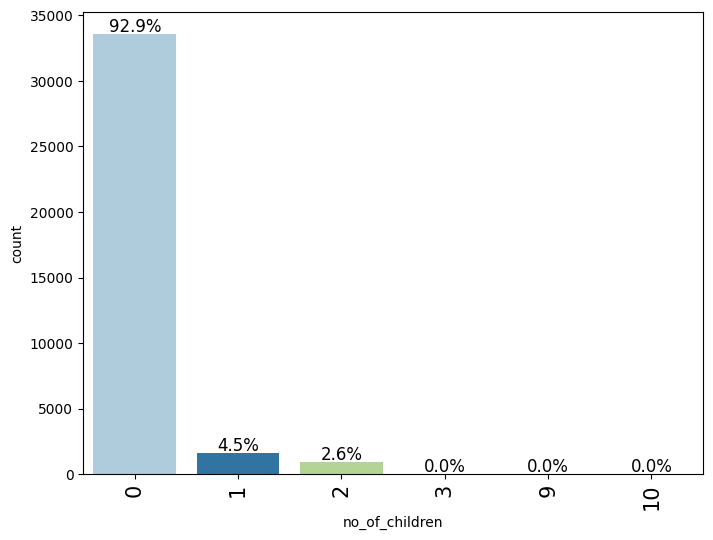

In [ ]:
labeled_barplot(df, "no_of_children", perc=True)

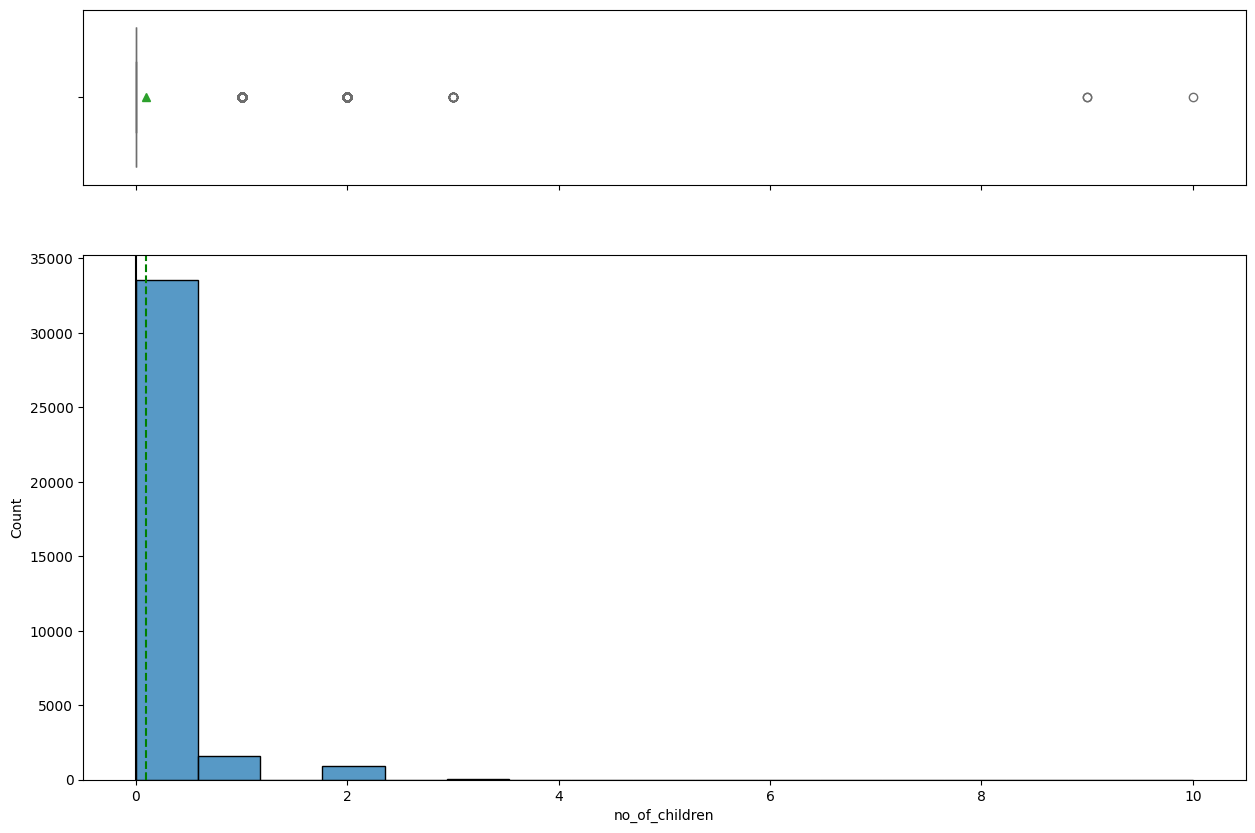

In [ ]:
histogram_boxplot(df,"no_of_children")

In [ ]:
df[df['no_of_children']>8]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
6338    INN06339             2              10                     0   
10041   INN10042             1               9                     2   
10061   INN10062             2               9                     2   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
6338                   2       Meal Plan 1                           0   
10041                  1       Meal Plan 1                           0   
10061                  5       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
6338         Room_Type 4         37          2018              1   
10041        Room_Type 1         11          2017             10   
10061        Room_Type 2          8          2017              8   

       arrival_date market_segment_type  repeated_guest  \
6338             12              Online               0   
10041            11           Corporate               0   
10061            13              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
6338                              0                                     0   
10041                             0                                     0   
10061                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
6338                84.45                       1   Not_Canceled  
10041               95.00                       0   Not_Canceled  
10061               76.50                       1       Canceled

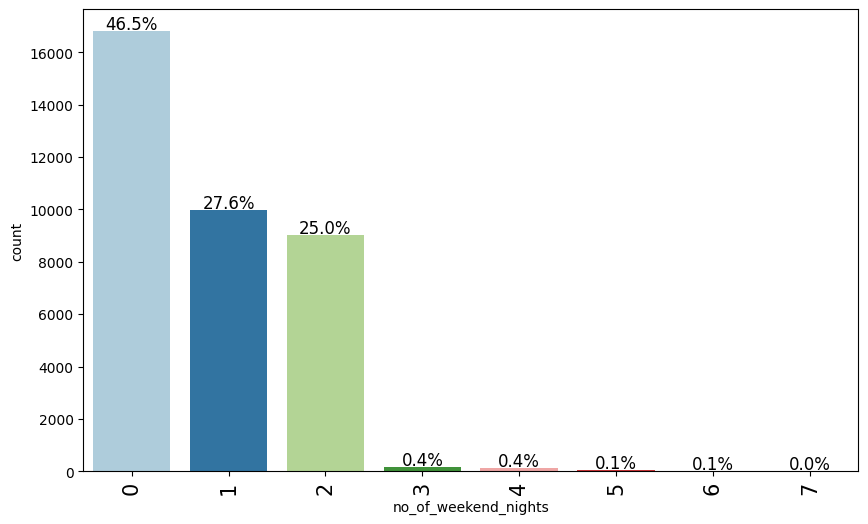

In [ ]:
labeled_barplot(df, "no_of_weekend_nights", perc=True)

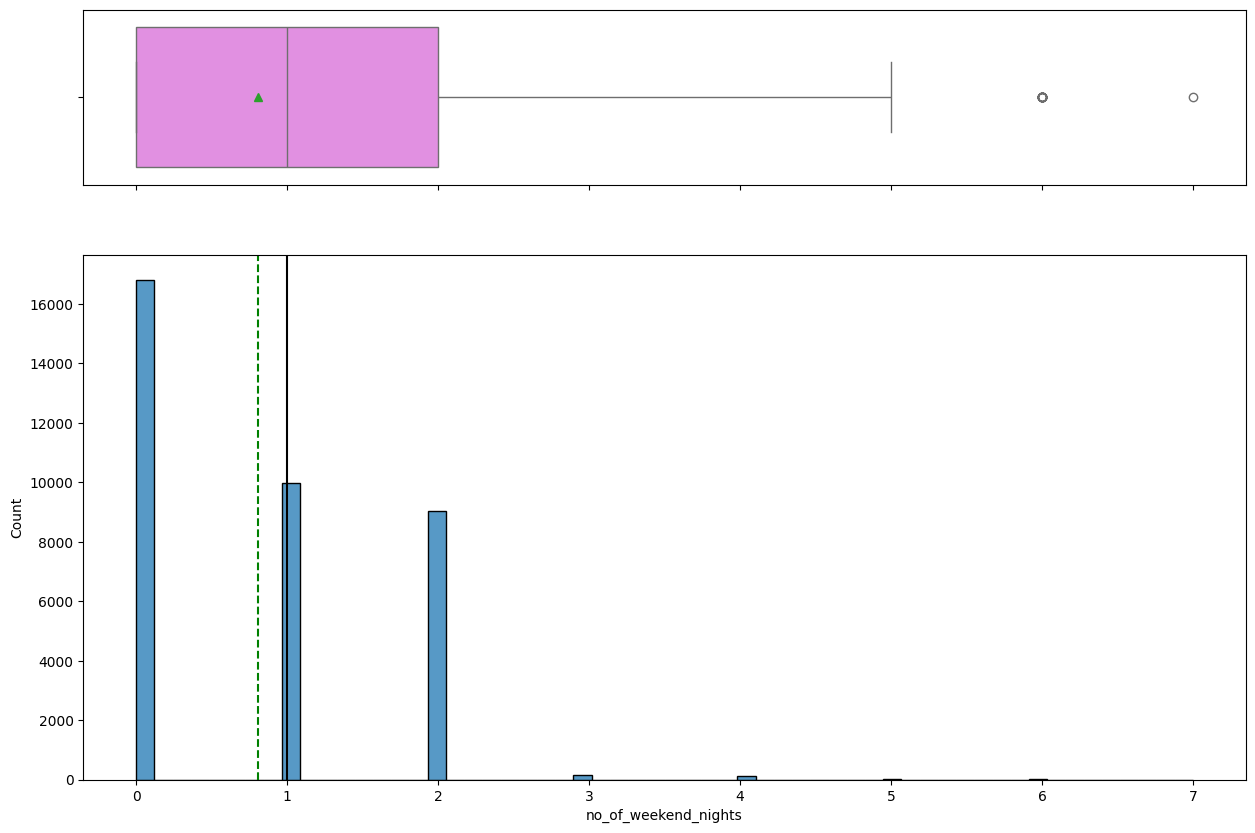

In [ ]:
histogram_boxplot(df,"no_of_weekend_nights")

In [ ]:
df[df['no_of_weekend_nights']>5]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
539     INN00540             1               0                     6   
1588    INN01589             1               0                     6   
2296    INN02297             1               0                     6   
2710    INN02711             2               0                     6   
6929    INN06930             2               0                     6   
7160    INN07161             2               0                     6   
8528    INN08529             2               0                     6   
14275   INN14276             1               0                     6   
16977   INN16978             1               0                     6   
17938   INN17939             1               0                     6   
18160   INN18161             1               0                     6   
18610   INN18611             1               0                     6   
19512   INN19513             2               0                     7   
19745   INN19746             1               0                     6   
27130   INN27131             1               0                     6   
32187   INN32188             2               0                     6   
32322   INN32323             1               0                     6   
33019   INN33020             1               0                     6   
34092   INN34093             2               0                     6   
35199   INN35200             1               0                     6   
36163   INN36164             1               0                     6   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
539                   15       Meal Plan 1                           0   
1588                  13       Meal Plan 1                           0   
2296                  14       Meal Plan 1                           0   
2710                  13      Not Selected                           0   
6929                  15      Not Selected                           0   
7160                  14       Meal Plan 1                           0   
8528                  14      Not Selected                           0   
14275                 14       Meal Plan 1                           0   
16977                 17       Meal Plan 1                           0   
17938                 15       Meal Plan 1                           0   
18160                 12      Not Selected                           0   
18610                 14       Meal Plan 1                           0   
19512                 17       Meal Plan 1                           0   
19745                 16       Meal Plan 1                           0   
27130                 12       Meal Plan 1                           0   
32187                 13      Not Selected                           0   
32322                 15       Meal Plan 1                           0   
33019                 17       Meal Plan 1                           0   
34092                 16      Not Selected                           0   
35199                 14       Meal Plan 1                           0   
36163                 13       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
539          Room_Type 4         12          2018              3   
1588         Room_Type 1          5          2017             10   
2296         Room_Type 1         17          2018             11   
2710         Room_Type 1         64          2018              3   
6929         Room_Type 1         17          2018             12   
7160         Room_Type 1          6          2018              1   
8528         Room_Type 1         11          2018             11   
14275        Room_Type 1         29          2018              2   
16977        Room_Type 1          9          2018              1   
17938        Room_Type 1          8          2018              4   
18160        Room_Type 1        102         

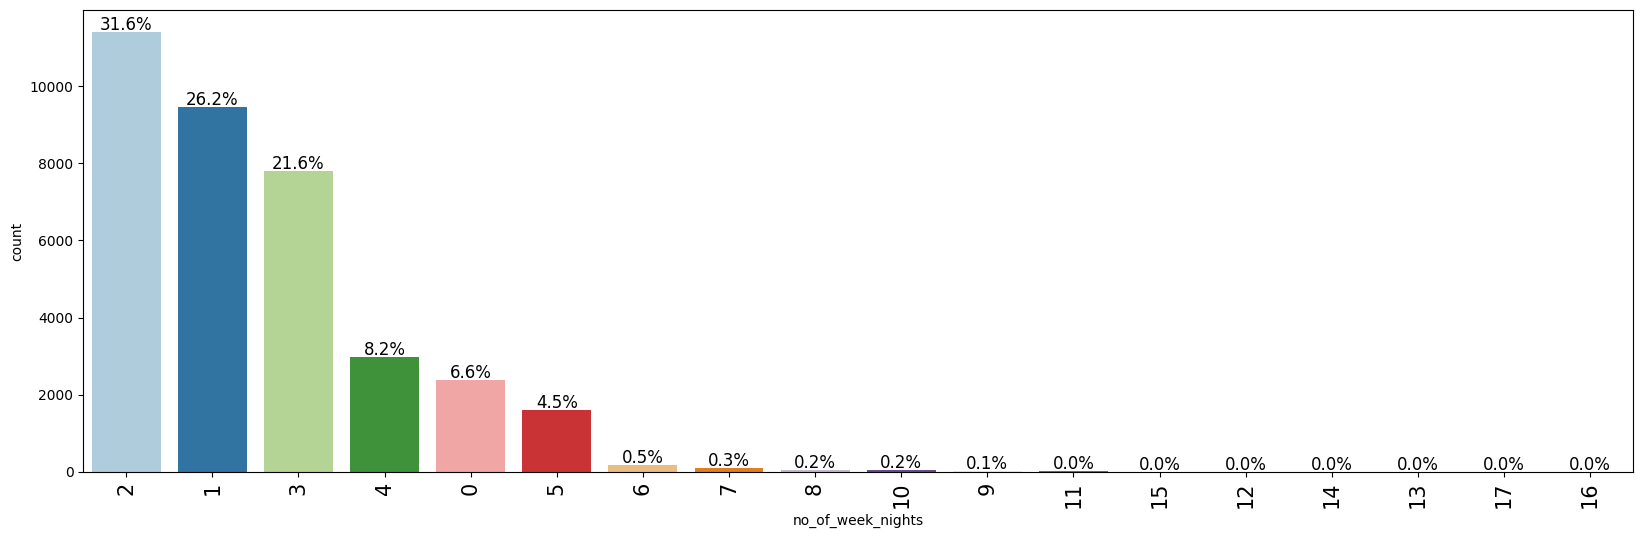

In [ ]:
labeled_barplot(df, "no_of_week_nights", perc=True)

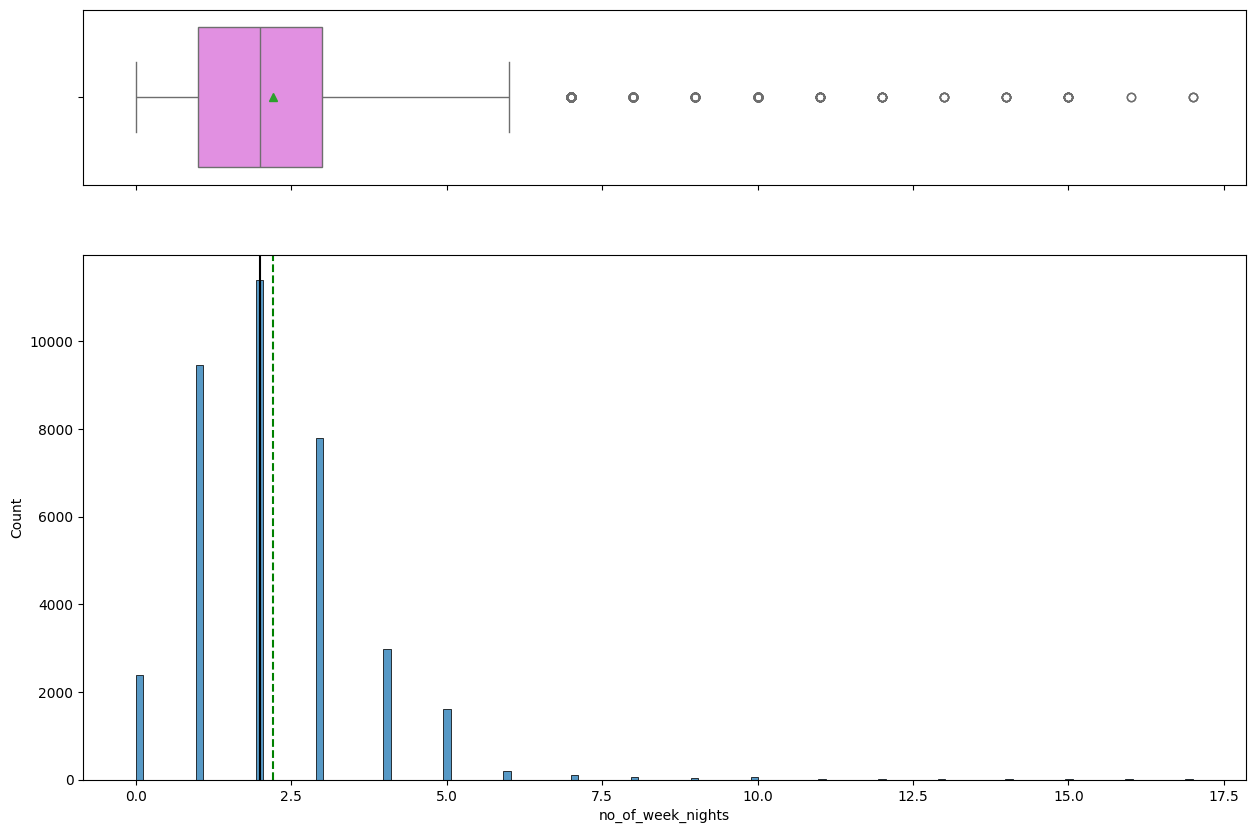

In [ ]:
histogram_boxplot(df,"no_of_week_nights")

In [ ]:
df[df['no_of_week_nights']>6]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
194     INN00195             2               0                     4   
380     INN00381             2               0                     4   
477     INN00478             2               0                     3   
539     INN00540             1               0                     6   
554     INN00555             1               2                     4   
...          ...           ...             ...                   ...   
35784   INN35785             2               0                     4   
35904   INN35905             2               2                     4   
36130   INN36131             2               0                     2   
36163   INN36164             1               0                     6   
36207   INN36208             1               0                     2   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
194                   10       Meal Plan 1                           0   
380                   11       Meal Plan 1                           0   
477                    7      Not Selected                           0   
539                   15       Meal Plan 1                           0   
554                    9       Meal Plan 1                           0   
...                  ...               ...                         ...   
35784                  8       Meal Plan 1                           0   
35904                 10       Meal Plan 1                           0   
36130                  7       Meal Plan 1                           0   
36163                 13       Meal Plan 1                           0   
36207                  7       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
194          Room_Type 4        147          2018              8   
380          Room_Type 4        237          2018              9   
477          Room_Type 1        217          2018             12   
539          Room_Type 4         12          2018              3   
554          Room_Type 6         30          2018             11   
...                  ...        ...           ...            ...   
35784        Room_Type 4          5          2018              2   
35904        Room_Type 6         43          2018              3   
36130        Room_Type 1        117          2018             12   
36163        Room_Type 4        102          2018              5   
36207        Room_Type 1         71          2018              6   

       arrival_date market_segment_type  repeated_guest  \
194               3              Online               0   
380              13              Online               0   
477               5              Online               0   
539              30              Online               0   
554               2              Online               0   
...             ...                 ...             ...   
35784            12              Online               0   
35904            25              Online               0   
36130            20              Online               0   
36163            15              Online               0   
36207            10              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
194                               0                                     0   
380                               0                                     0   
477                               0                                     0   
539                               0                                     0   
554                               0                                     0   
...                             ...                                   ...   
35784                             0                                     0   
35904                             0                                     0   
36130                            

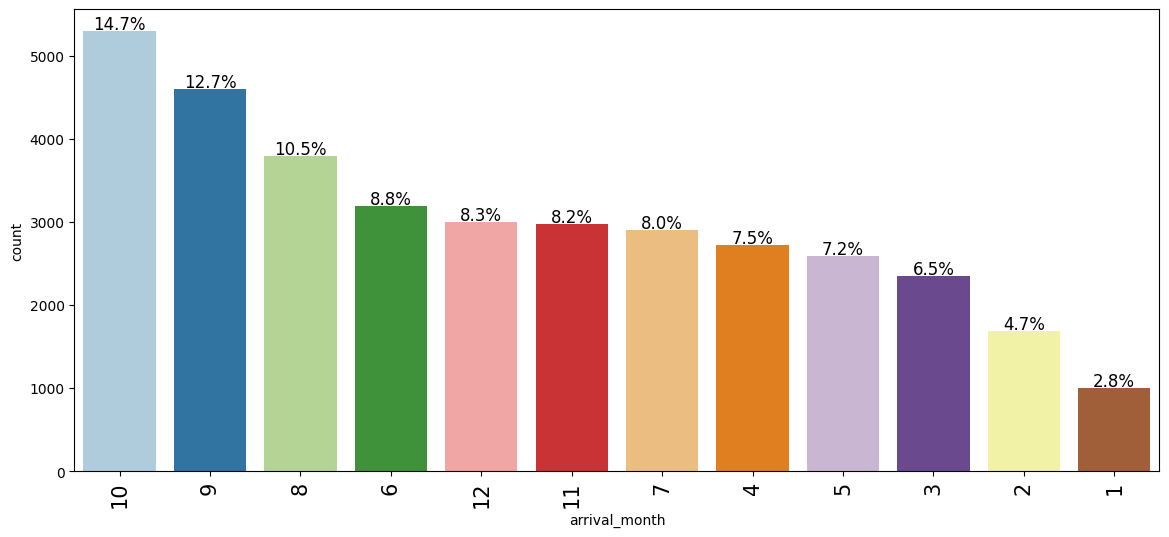

In [ ]:
labeled_barplot(df, "arrival_month", perc=True)

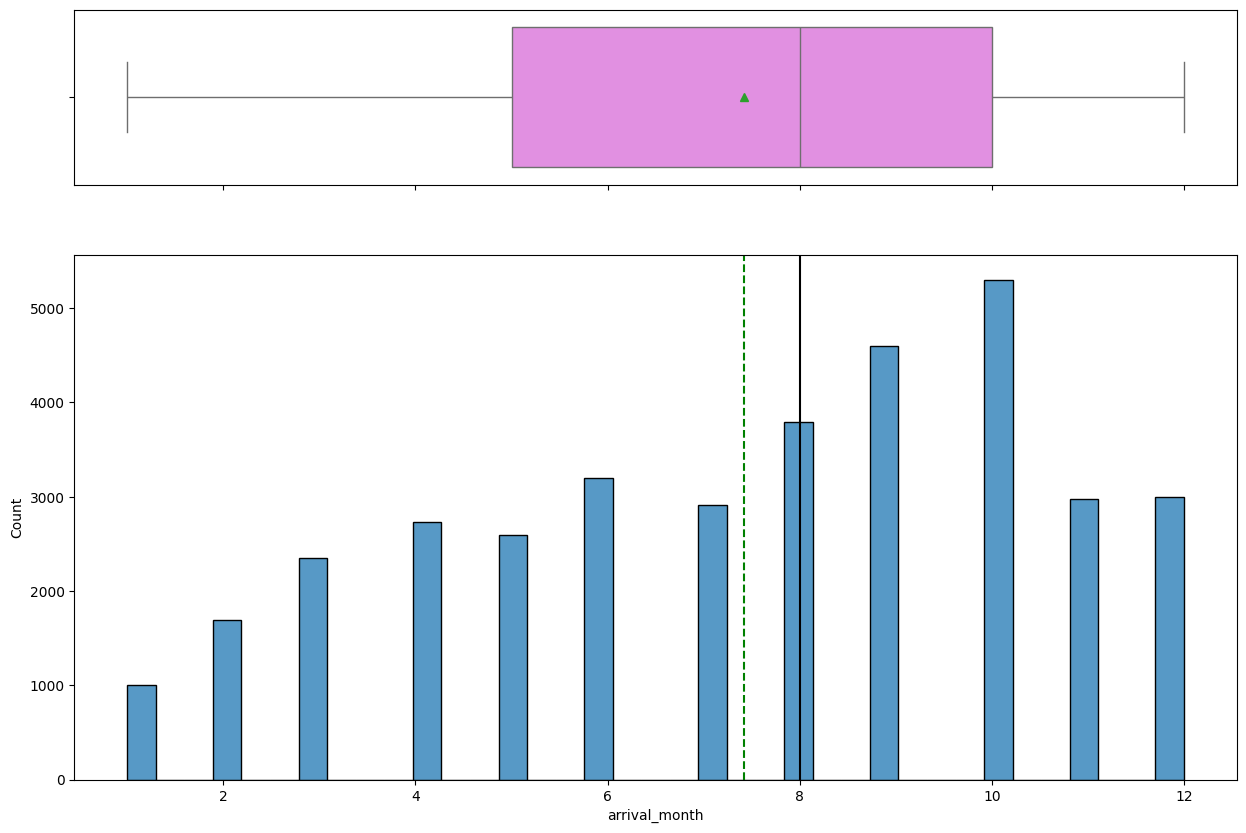

In [ ]:
histogram_boxplot(df, "arrival_month")

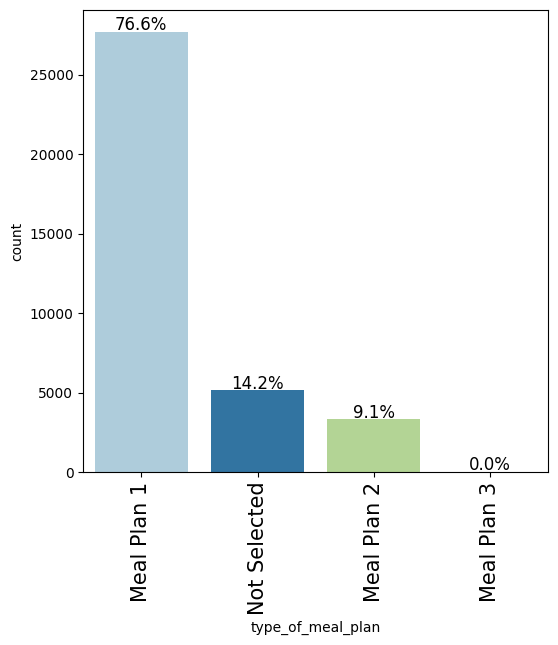

In [ ]:
labeled_barplot(df, "type_of_meal_plan", perc=True)

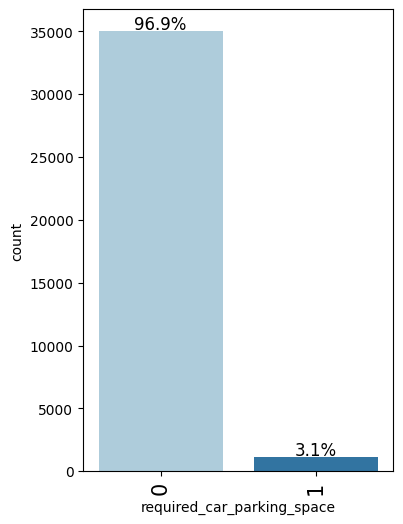

In [ ]:
labeled_barplot(df, "required_car_parking_space", perc=True)

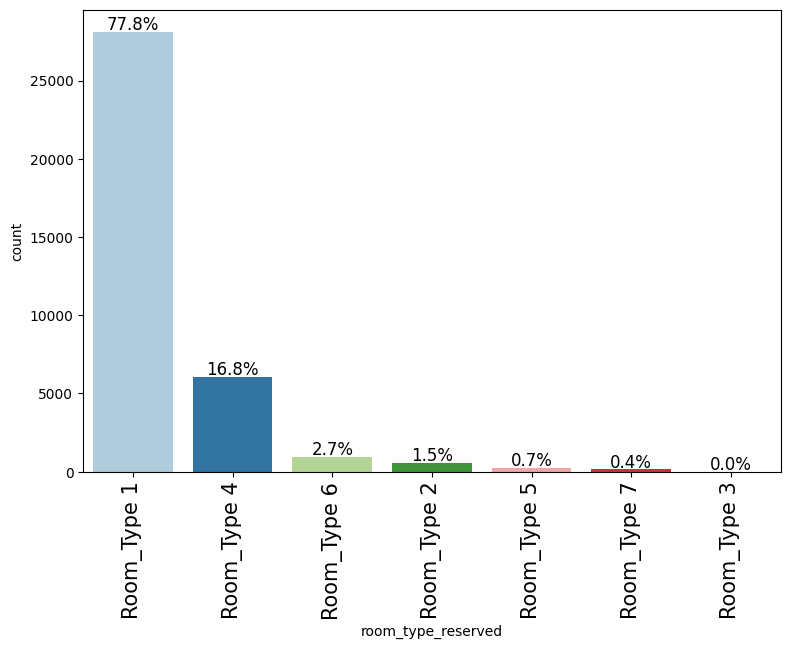

In [ ]:
labeled_barplot(df, "room_type_reserved", perc=True)

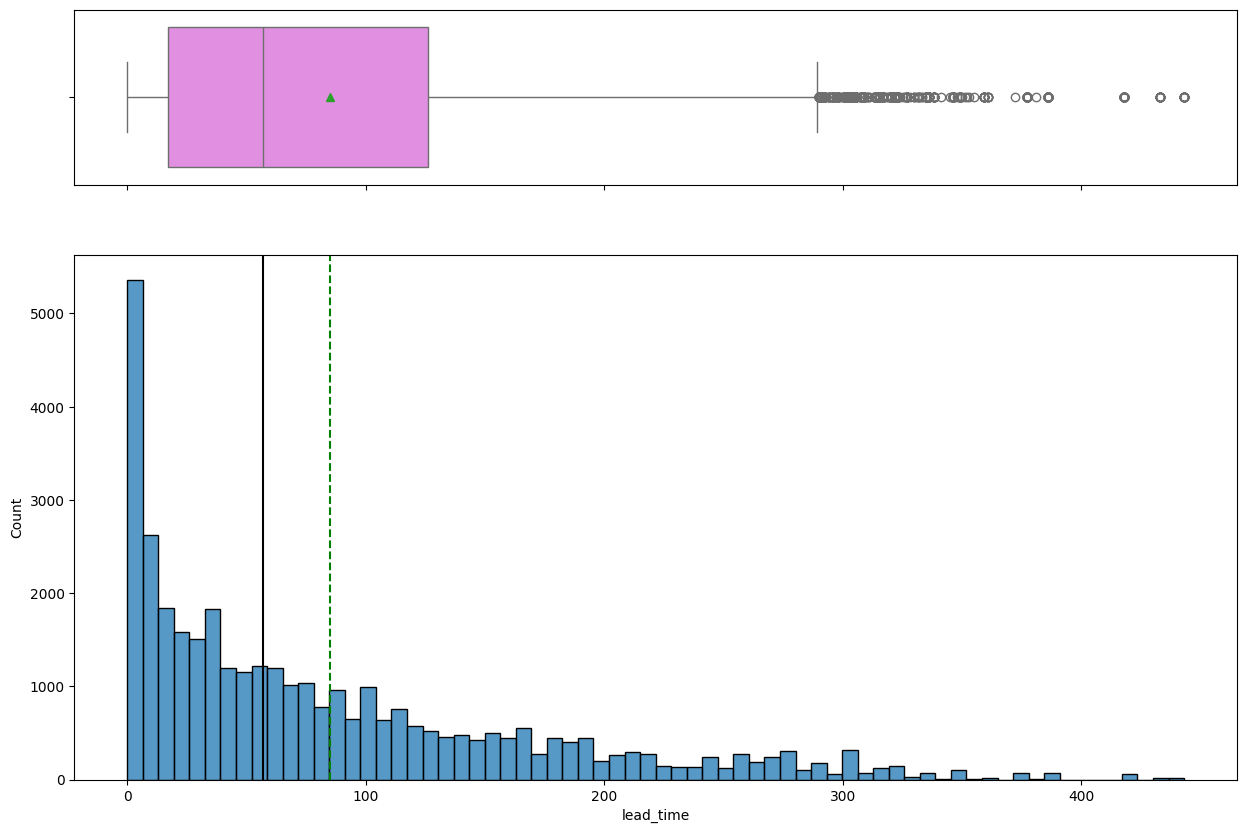

In [ ]:

histogram_boxplot(df, 'lead_time')

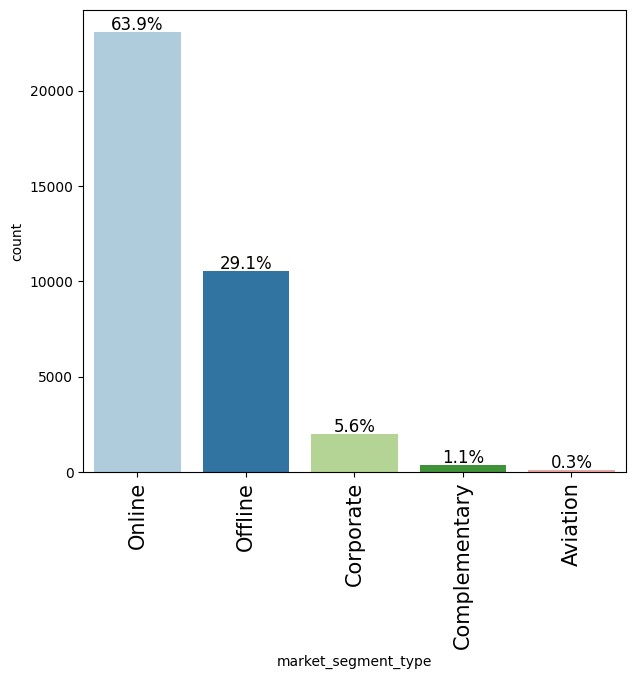

In [ ]:
labeled_barplot(df, "market_segment_type", perc=True)

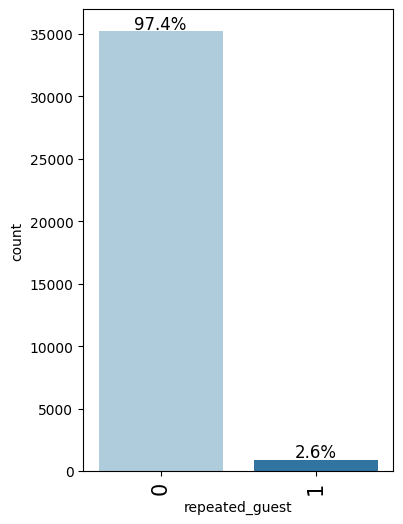

In [ ]:
labeled_barplot(df, "repeated_guest", perc=True)

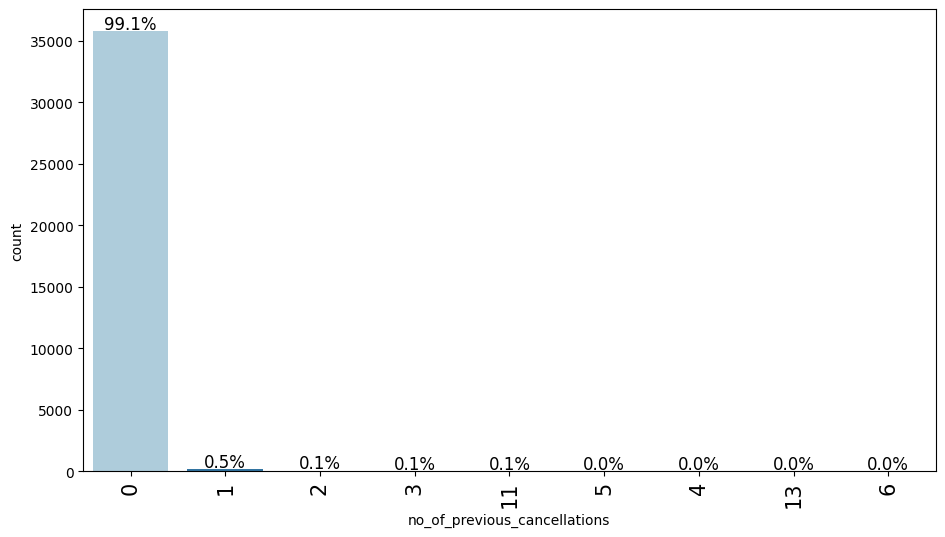

In [ ]:
labeled_barplot(df, "no_of_previous_cancellations", perc=True)

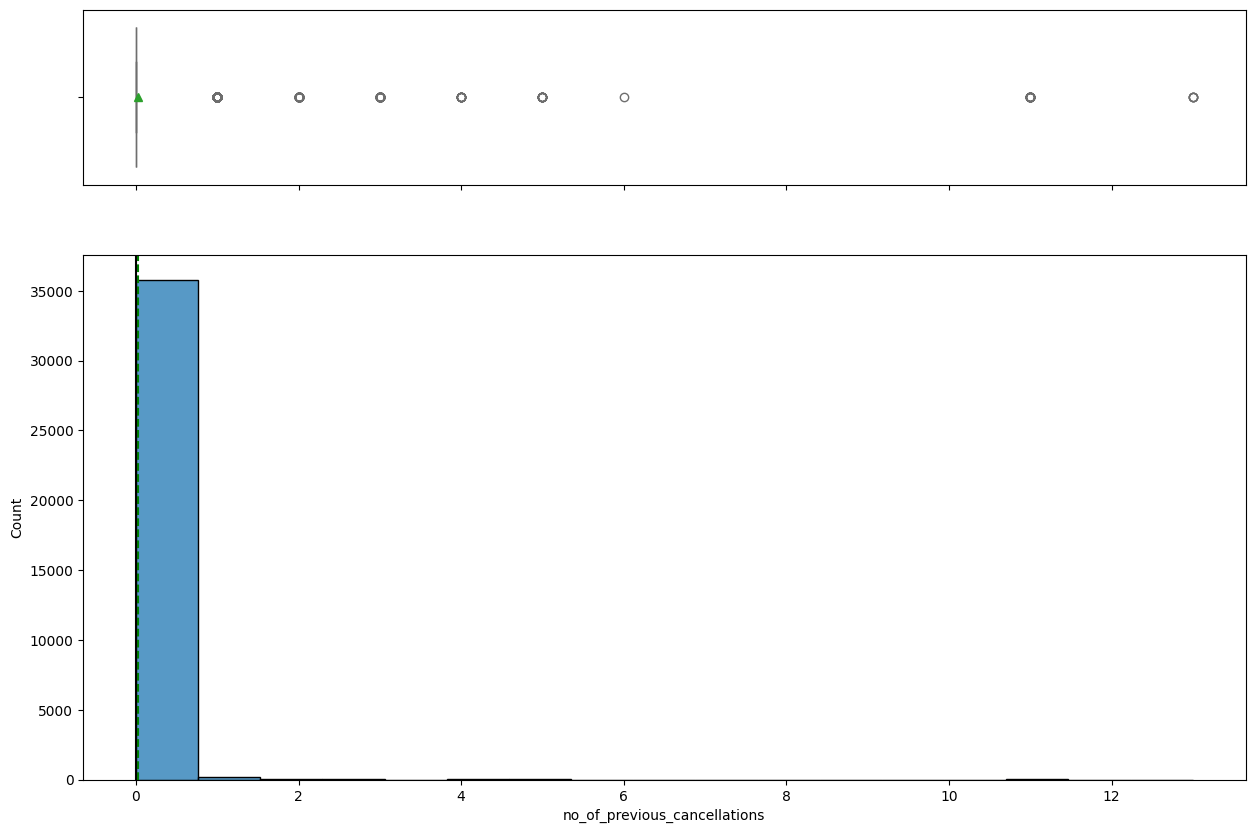

In [ ]:

histogram_boxplot(df, 'no_of_previous_cancellations')

In [ ]:
df[df['no_of_previous_cancellations']>9]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
1561    INN01562             2               0                     0   
3322    INN03323             2               0                     0   
3530    INN03531             2               0                     0   
7110    INN07111             2               0                     0   
10686   INN10687             2               0                     0   
10890   INN10891             2               0                     0   
11834   INN11835             2               0                     0   
12097   INN12098             2               0                     1   
12109   INN12110             2               0                     1   
12554   INN12555             2               0                     0   
14030   INN14031             2               0                     0   
16277   INN16278             2               0                     1   
16919   INN16920             1               0                     0   
19779   INN19780             3               0                     0   
20739   INN20740             1               0                     0   
23792   INN23793             1               0                     0   
24950   INN24951             2               0                     1   
27499   INN27500             2               0                     1   
28891   INN28892             2               0                     0   
28914   INN28915             2               0                     2   
28972   INN28973             1               0                     0   
30363   INN30364             2               0                     1   
30833   INN30834             2               0                     1   
32148   INN32149             1               0                     0   
32722   INN32723             2               0                     1   
33760   INN33761             2               0                     0   
34906   INN34907             2               0                     0   
34909   INN34910             2               0                     2   
36079   INN36080             1               0                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
1561                   1       Meal Plan 1                           0   
3322                   1       Meal Plan 1                           0   
3530                   1      Not Selected                           1   
7110                   1      Not Selected                           0   
10686                  2      Not Selected                           0   
10890                  1      Not Selected                           0   
11834                  2      Not Selected                           1   
12097                  1       Meal Plan 1                           0   
12109                  1       Meal Plan 1                           0   
12554                  1       Meal Plan 1                           0   
14030                  2      Not Selected                           0   
16277                  1       Meal Plan 1                           0   
16919                  2       Meal Plan 1                           0   
19779                  3       Meal Plan 1                           0   
20739                  1       Meal Plan 1                           0   
23792                  2       Meal Plan 1                           0   
24950                  0       Meal Plan 1                           0   
27499                  1       Meal Plan 1                           0   
28891                  1      Not Selected                           0   
28914                  2       Meal Plan 1                           0   
28972                  1       Meal Plan 1                           0   
30363                  2       Meal Plan 1                           0   
30833                  1       Meal Plan 1                           0   
32148                  2       Meal Plan 1                           

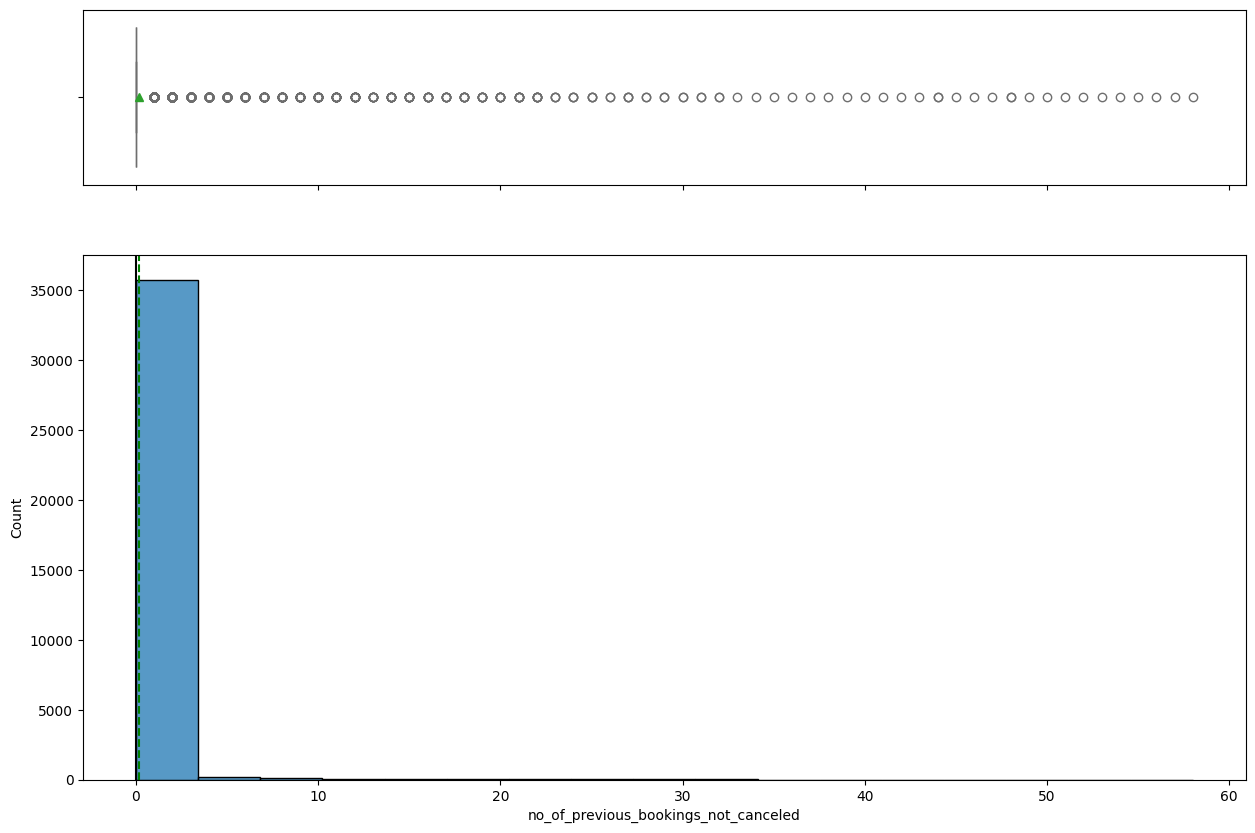

In [ ]:

histogram_boxplot(df, 'no_of_previous_bookings_not_canceled')

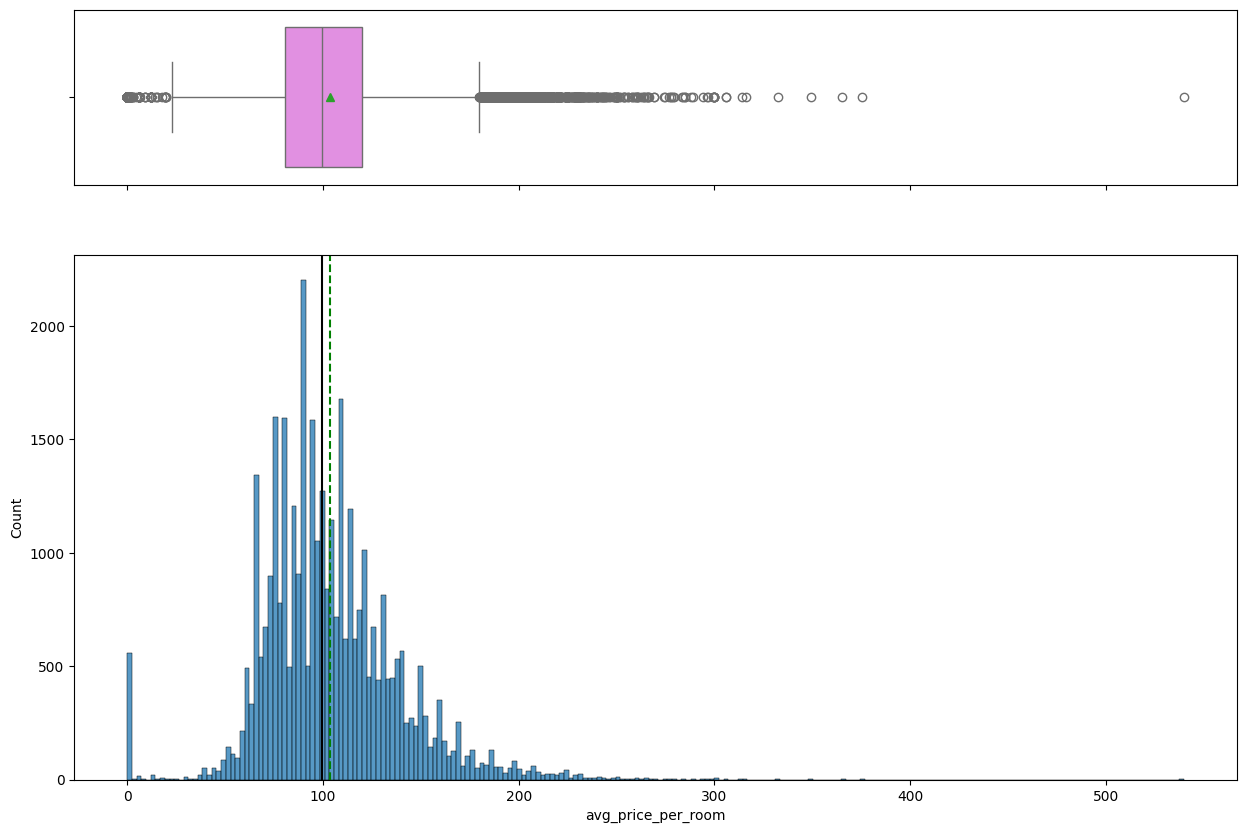

In [ ]:
histogram_boxplot(df, 'avg_price_per_room')

In [ ]:
df[(df['avg_price_per_room']==0) & (df['market_segment_type']!='Complementary') ]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
1046    INN01047             1               0                     0   
1158    INN01159             2               0                     0   
1176    INN01177             1               0                     0   
1401    INN01402             1               0                     0   
1403    INN01404             3               0                     0   
1907    INN01908             2               0                     0   
1986    INN01987             2               0                     0   
2088    INN02089             2               0                     0   
2472    INN02473             2               0                     0   
2514    INN02515             1               0                     0   
2749    INN02750             1               0                     0   
2780    INN02781             1               0                     0   
2933    INN02934             2               0                     0   
3023    INN03024             1               0                     0   
3104    INN03105             1               0                     0   
3570    INN03571             1               0                     0   
3759    INN03760             1               0                     0   
4130    INN04131             1               0                     0   
4517    INN04518             2               0                     0   
4610    INN04611             2               0                     0   
5051    INN05052             2               0                     0   
5345    INN05346             1               0                     0   
6154    INN06155             1               0                     0   
6353    INN06354             1               0                     1   
6389    INN06390             1               0                     0   
6823    INN06824             1               0                     0   
7039    INN07040             1               0                     0   
7071    INN07072             1               0                     0   
7670    INN07671             1               0                     0   
7707    INN07708             1               0                     1   
7723    INN07724             2               0                     0   
7931    INN07932             1               0                     0   
8217    INN08218             1               0                     0   
8456    INN08457             1               0                     0   
8503    INN08504             2               0                     0   
8613    INN08614             2               0                     0   
8885    INN08886             2               0                     1   
9328    INN09329             1               0                     0   
9704    INN09705             1               0                     0   
9726    INN09727             2               0                     0   
9865    INN09866             2               0                     0   
9916    INN09917             2               0                     0   
10035   INN10036             2               0                     0   
10116   INN10117             1               0                     2   
10218   INN10219             1               0                     0   
10285   INN10286             1               0                     0   
10837   INN10838             1               0                     2   
10915   INN10916             2               0                     0   
10983   INN10984             1               0                     0   
11005   INN11006             1               0                     0   
11039   INN11040             1               0                     0   
11323   INN11324             2               0                     0   
11930   INN11931             2               0                     1   
12002   INN12003             1               0                     0   
12027   INN12028             2               0

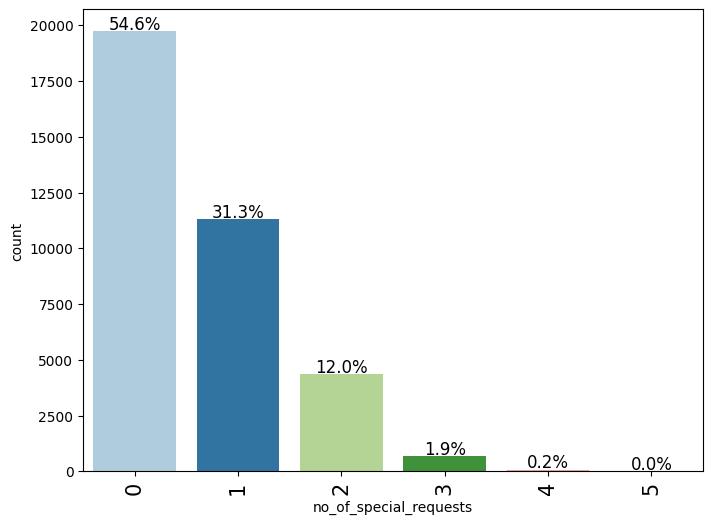

In [ ]:
labeled_barplot(df, "no_of_special_requests", perc=True)

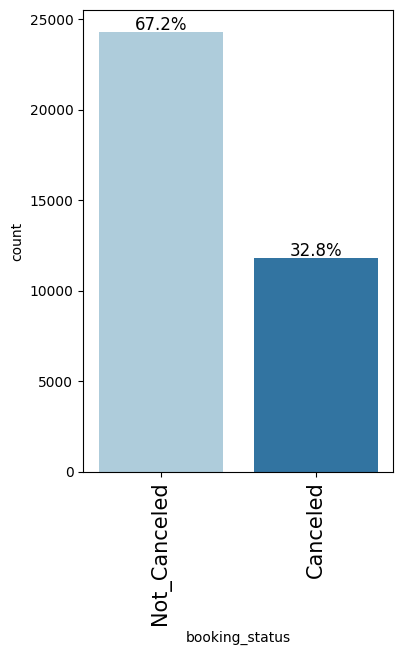

In [ ]:
labeled_barplot(df, "booking_status", perc=True)

***Notes*** :
* 72% of the bookings made for 2 adults
* 93% of the times customers are travelling without children
* 46% of the bookings were made excludes weekend nights where as 52% times bookings made includes weekend nights
* 31% of times the no. of week nights booked is 2.
* 77% bookings opted Meal plan 1 and the least opted meal plan is Meal plan 3.
* 97% customer has not opted for car packing spaces.
* 77 % of the bookings are made with Toom type 1 and the least bookings were made for Room type 3
* Distribution of lead time is right skewed with a mean time of 85 days
* 64 % of the bookings are made through Online
* 97 % times the customers are not the repeated customers
* most of the times the customers are not cancelling the bookings upfront
* Average price of the rooms falls between 99 and 103. Min is 80 and Max is 540
* 33% of the bookings were cancelled by customers
* 50% of the guests not made special requests however there are exceptions
* Most of the bookings are not-cancelled

#### Bivariate analysis

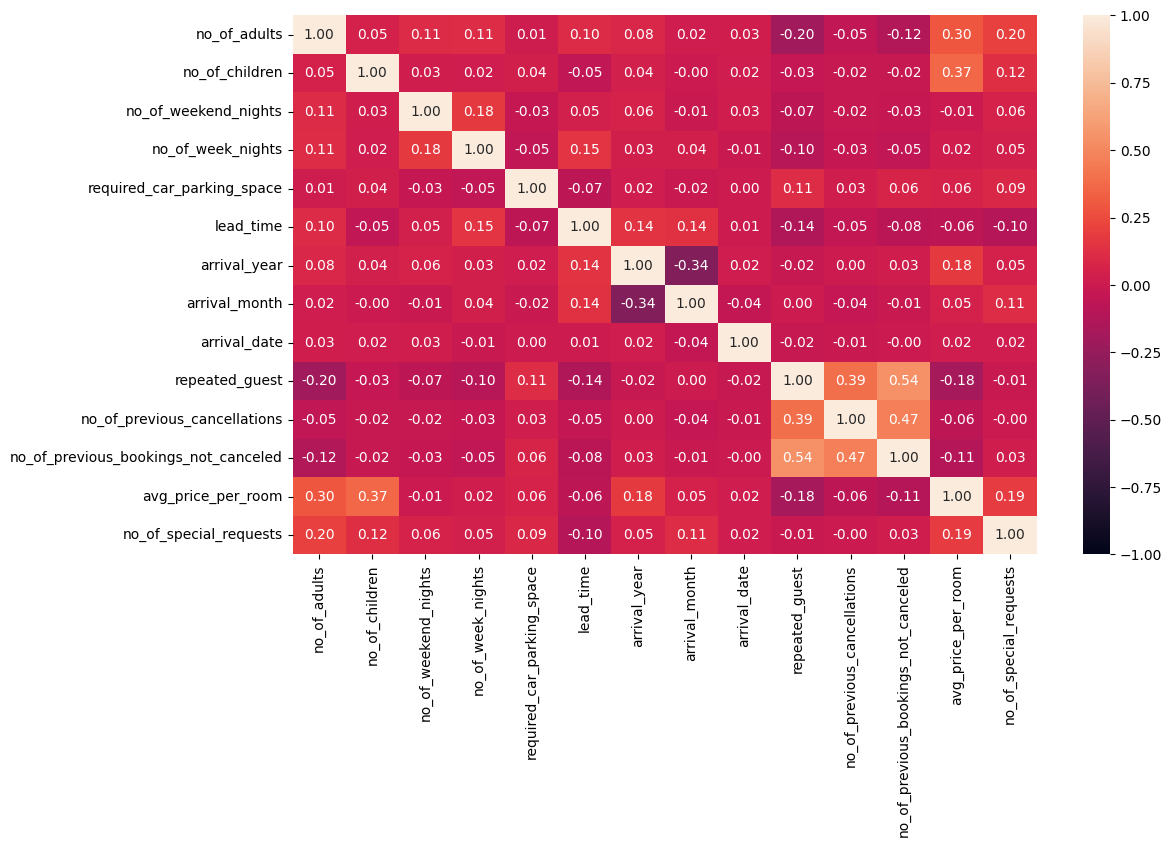

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

* repeated_guest and no_of_previous_not_cancelled are postiviely correlated


##### What are the busiest months in the hotel?


Oct, Sept and Aug are the most busiest months with Oct as the highest bookings of 14.7%

##### Which market segment do most of the guests come from?

64 % of the bookings are made through Online

##### Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

<Axes: xlabel='market_segment_type', ylabel='avg_price_per_room'>

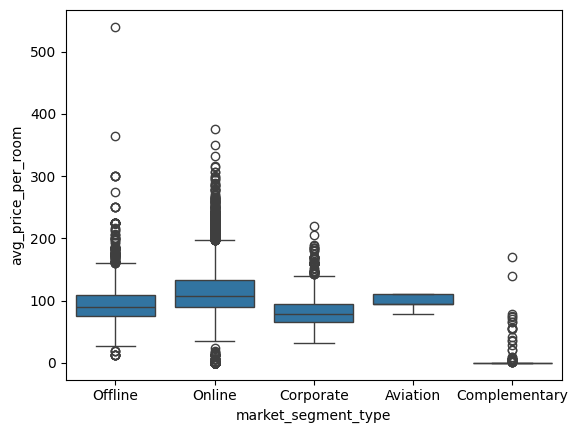

In [ ]:
sns.boxplot(df, y='avg_price_per_room', x='market_segment_type')

Room prices are high when booked through Online. Both Offline and corporate market segments have nearly same room prices and it is least for Complementary

##### What percentage of bookings are canceled?

32.8% bookings are cancelled

##### Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


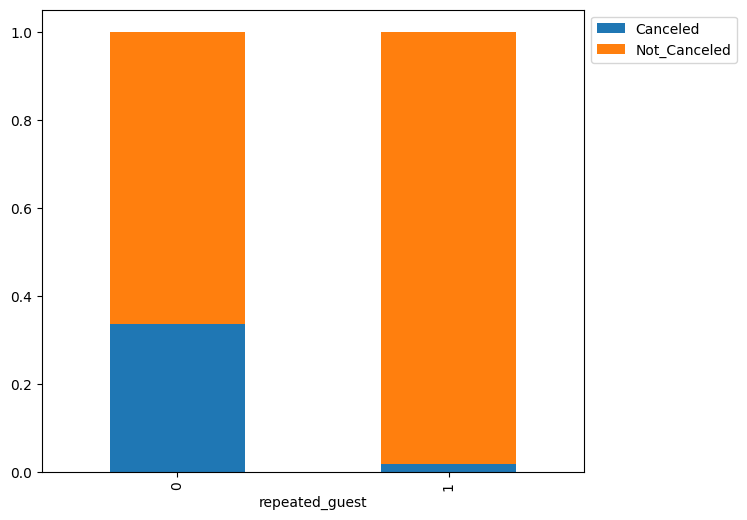

In [ ]:
stacked_barplot(data,'repeated_guest','booking_status')

<Axes: xlabel='repeated_guest'>

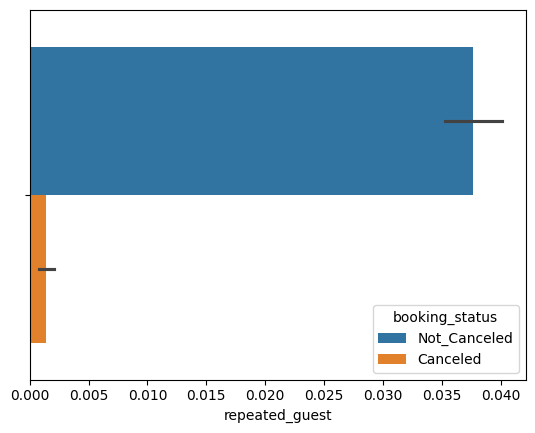

In [ ]:
sns.barplot(data = df, x='repeated_guest',hue='booking_status')

The cancelations are very rare and is less than 0.005 % for Repeated Guests

##### Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

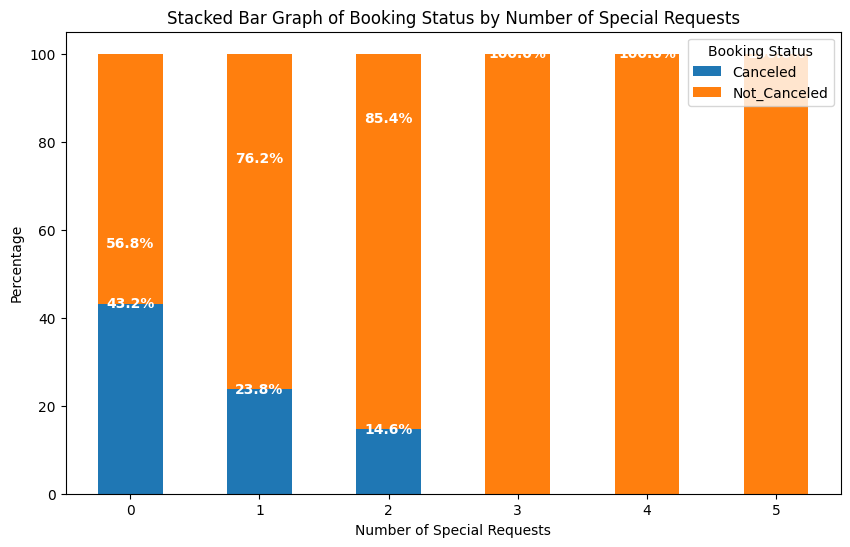

In [ ]:
# Calculate percentage for each booking_status within each no_of_special_requests
df_counts = df.groupby(['no_of_special_requests', 'booking_status']).size().unstack(fill_value=0)
df_percent = df_counts.div(df_counts.sum(axis=1), axis=0) * 100

# Plot
ax = df_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add percentage labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='white', weight='bold')

plt.xlabel('Number of Special Requests')
plt.ylabel('Percentage')
plt.title('Stacked Bar Graph of Booking Status by Number of Special Requests')
plt.legend(title='Booking Status')
plt.xticks(rotation=0)
plt.show()

43.2% of Booking cancellations happened for those which is not having

Histogram Plots


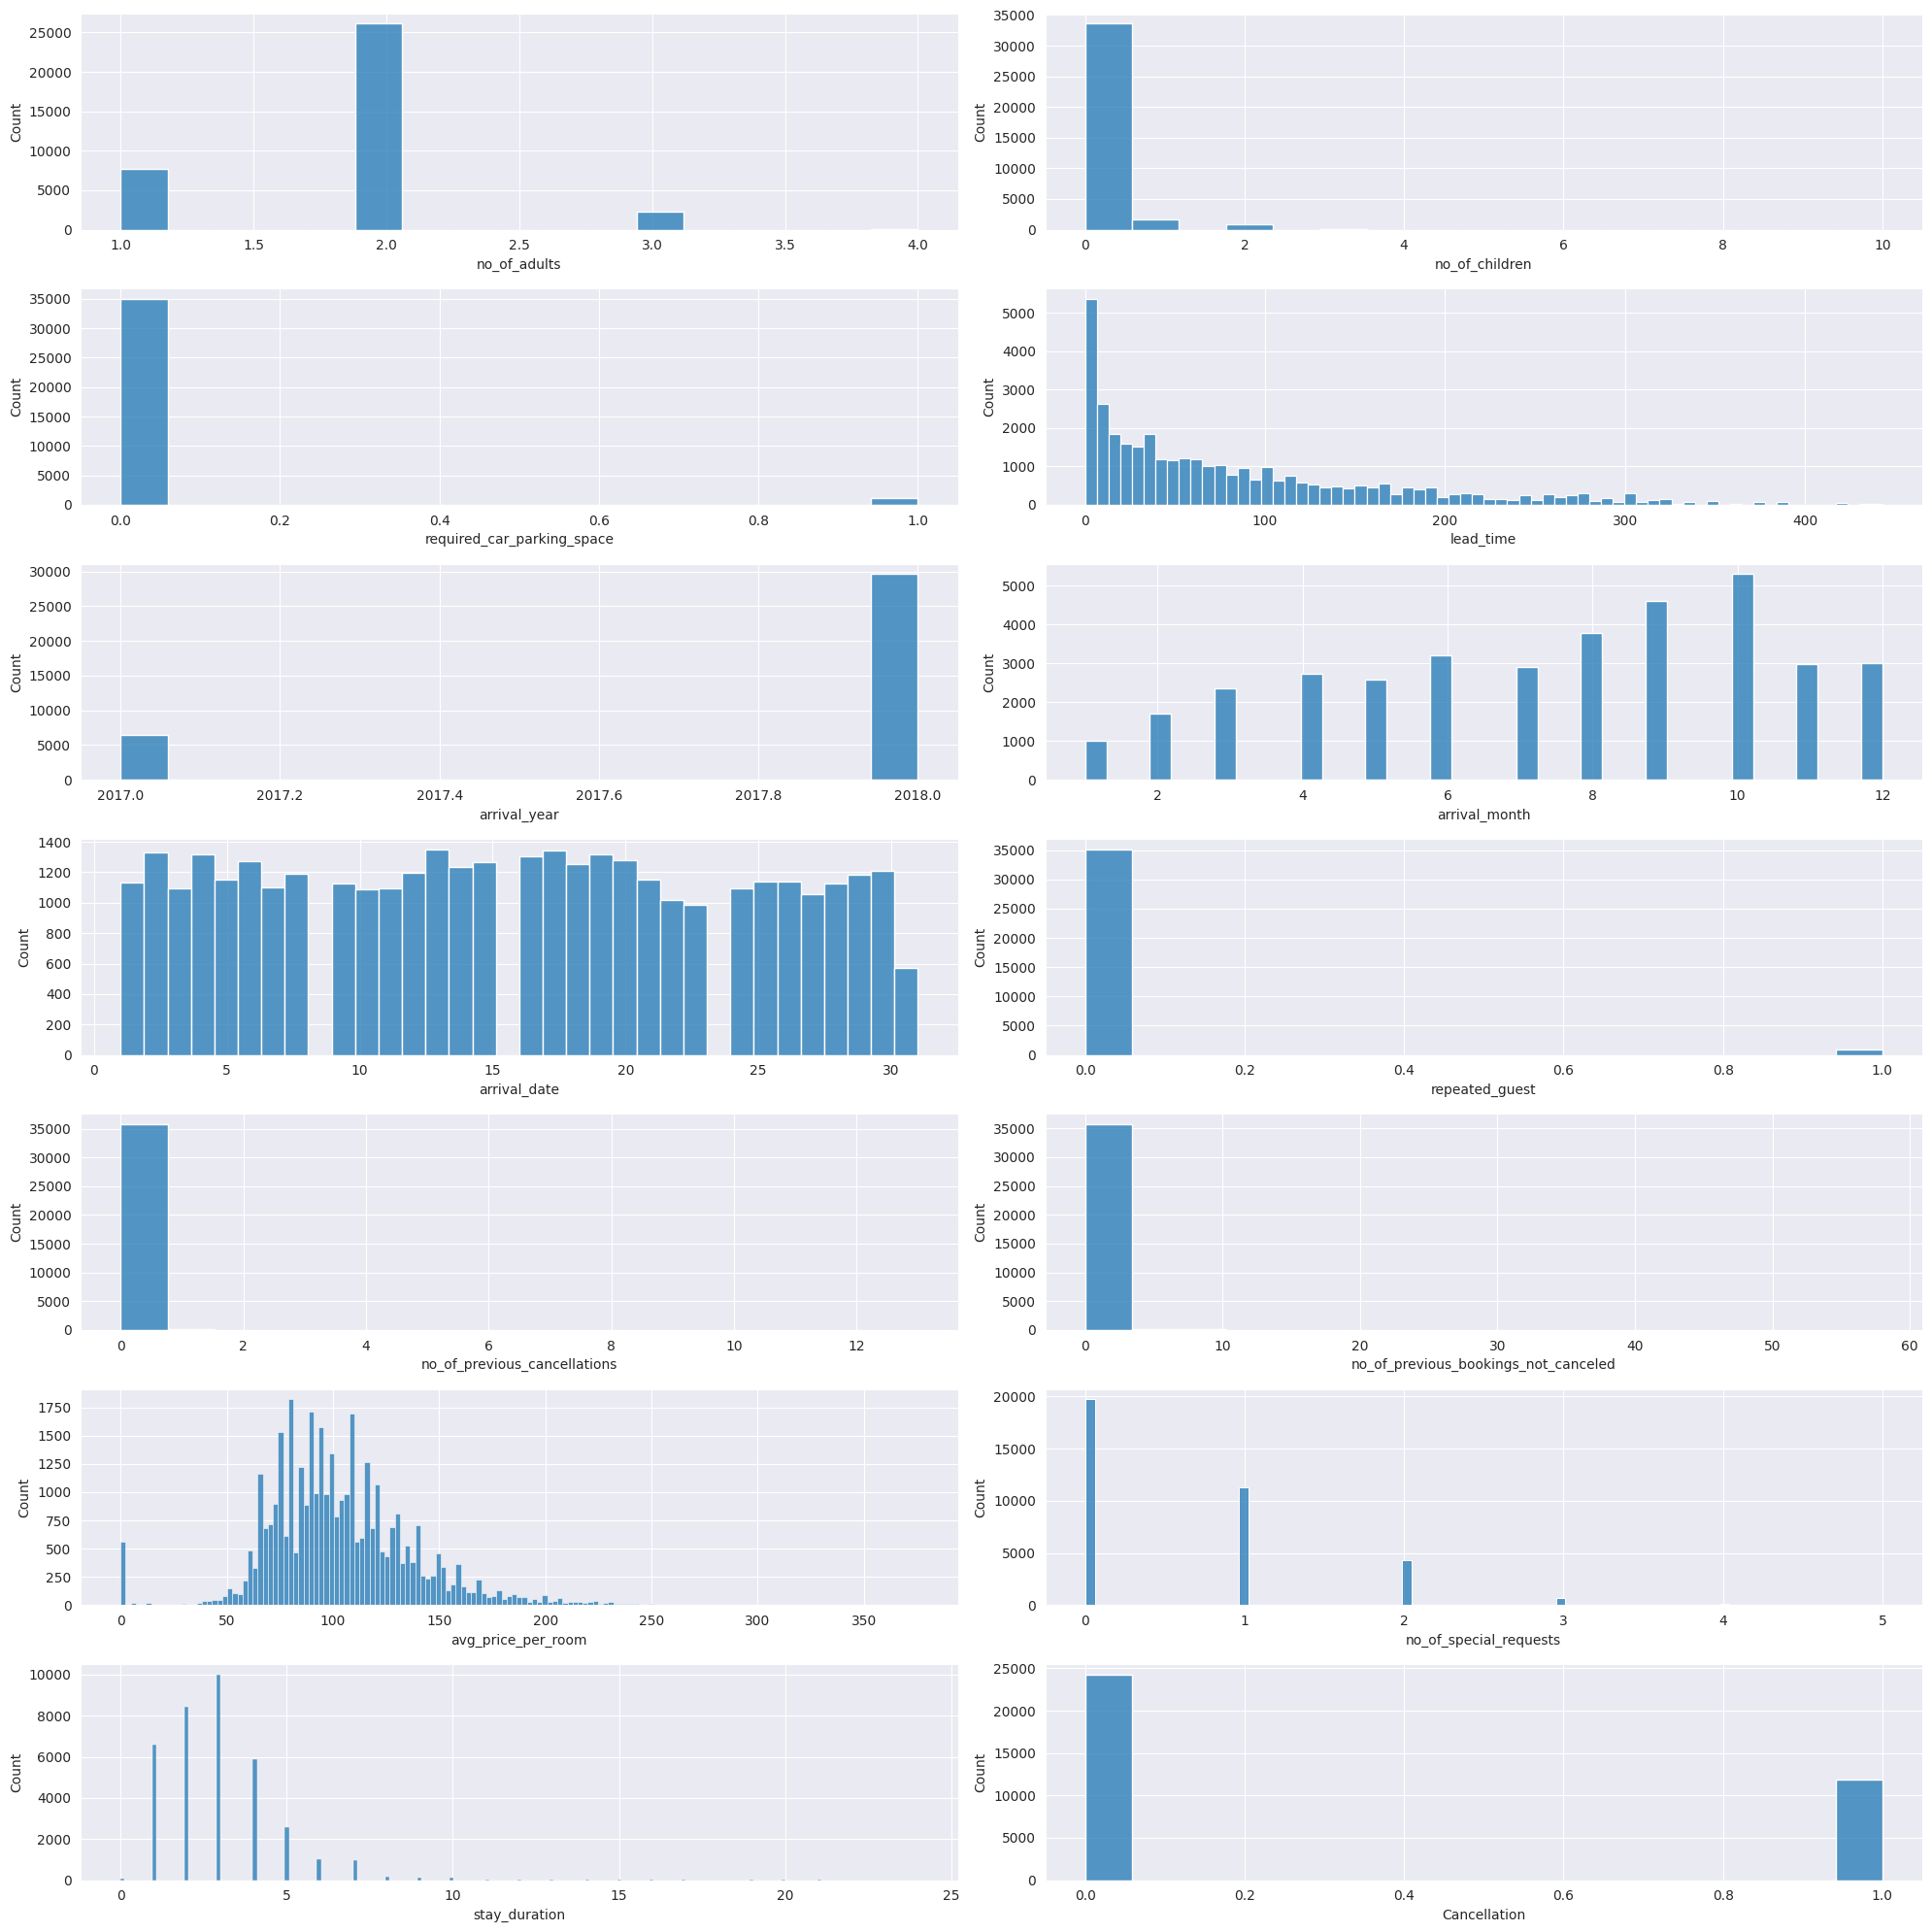

In [ ]:
num_col = df.select_dtypes(include=np.number).columns

fig=plt.figure(figsize=(20,20))
for i in range(0,len(num_col)):
  ax=fig.add_subplot(7,2,i+1)
  sns.histplot(df[num_col[i]])
  plt.tight_layout()
print('Histogram Plots')

In [ ]:
df[cat_col].value_counts()

type_of_meal_plan  room_type_reserved  market_segment_type
Meal Plan 1        Room_Type 1         Online                 10746
                                       Offline                 7298
                   Room_Type 4         Online                  4985
Not Selected       Room_Type 1         Online                  4851
Meal Plan 2        Room_Type 1         Offline                 2277
Meal Plan 1        Room_Type 1         Corporate               1812
                   Room_Type 6         Online                   842
Meal Plan 2        Room_Type 1         Online                   645
Meal Plan 1        Room_Type 4         Offline                  551
                   Room_Type 2         Online                   460
                   Room_Type 1         Complementary            239
Meal Plan 2        Room_Type 4         Online                   211
Not Selected       Room_Type 1         Offline                  170
Meal Plan 1        Room_Type 7         Online                   108
                   Room_Type 4         Corporate                 99
                   Room_Type 5         Online                    80
                                       Corporate                 74
                                       Offline                   71
                   Room_Type 4         Aviation                  65
Meal Plan 2        Room_Type 6         Online                    60
                   Room_Type 4         Offline                   60
Meal Plan 1        Room_Type 1         Aviation                  60
                   Room_Type 4         Complementary             48
                   Room_Type 2         Offline                   41
                   Room_Type 7         Complementary             33
Not Selected       Room_Type 4         Online                    32
                   Room_Type 2         Online                    23
                   Room_Type 6         Online                    22
Meal Plan 1        Room_Type 6         Offline                   20
                   Room_Type 5         Complementary             17
                   Room_Type 2         Complementary             17
Meal Plan 2        Room_Type 2         Offline                   16
Not Selected       Room_Type 1         Corporate                 15
Meal Plan 1        Room_Type 6         Complementary             12
Meal Plan 2        Room_Type 5         Offline                    8
Not Selected       Room_Type 5         Online                     7
Meal Plan 2        Room_Type 5         Online                     6
                   Room_Type 1         Corporate                  6
                                       Complementary              5
Meal Plan 1        Room_Type 7         Offline                    5
                                       Corporate                  5
                   Room_Type 6         Corporate                  3
Meal Plan 3        Room_Type 7         Complementary              3
Meal Plan 2        Room_Type 6         Offline                    3
Meal Plan 1        Room_Type 3         Online                     2
                   Room_Type 2         Corporate                  2
Not Selected       Room_Type 5         Offline                    2
Meal Plan 1        Room_Type 3         Offline                    2
Not Selected       Room_Type 4         Offline                    2
                   Room_Type 3         Complementary              2
Meal Plan 2        Room_Type 6         Complementary              2
Not Selected       Room_Type 1         Complementary              2
Meal Plan 2        Room_Type 7         Complementary              2
                   Room_Type 4         Complementary              2
Not Selected       Room_Type 4         Complementary              1
Meal Plan 3        Room_Type 4         Complementary              1
                   Room_Type 1         Offline                    1
Meal Plan 1        Room_Type 3         Corporate                 

Count Plots


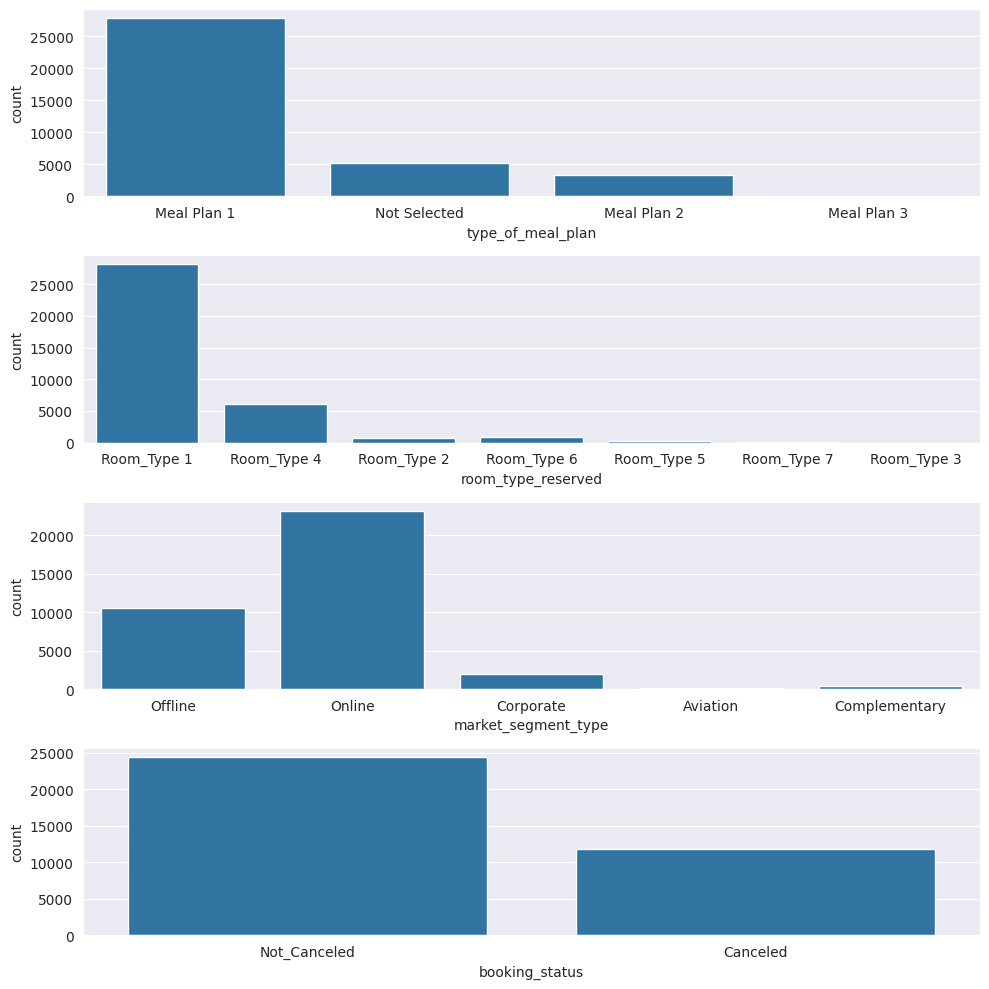

In [ ]:
cat_col = df.select_dtypes(include="object").columns

fig=plt.figure(figsize=(10,10))
for i in range(0,len(cat_columns)):
  ax=fig.add_subplot(4,1,i+1)
  sns.countplot(x=data[cat_columns[i]])
  plt.tight_layout()
print('Count Plots')

### Data Preprocessing

- Missing Value Treatment (with rationale if needed)
- Outlier Detection and Treatment (with rationale if needed)
- Feature Engineering (with rationale if needed)
- Data Scaling (with rationale if needed)
- Train-test split

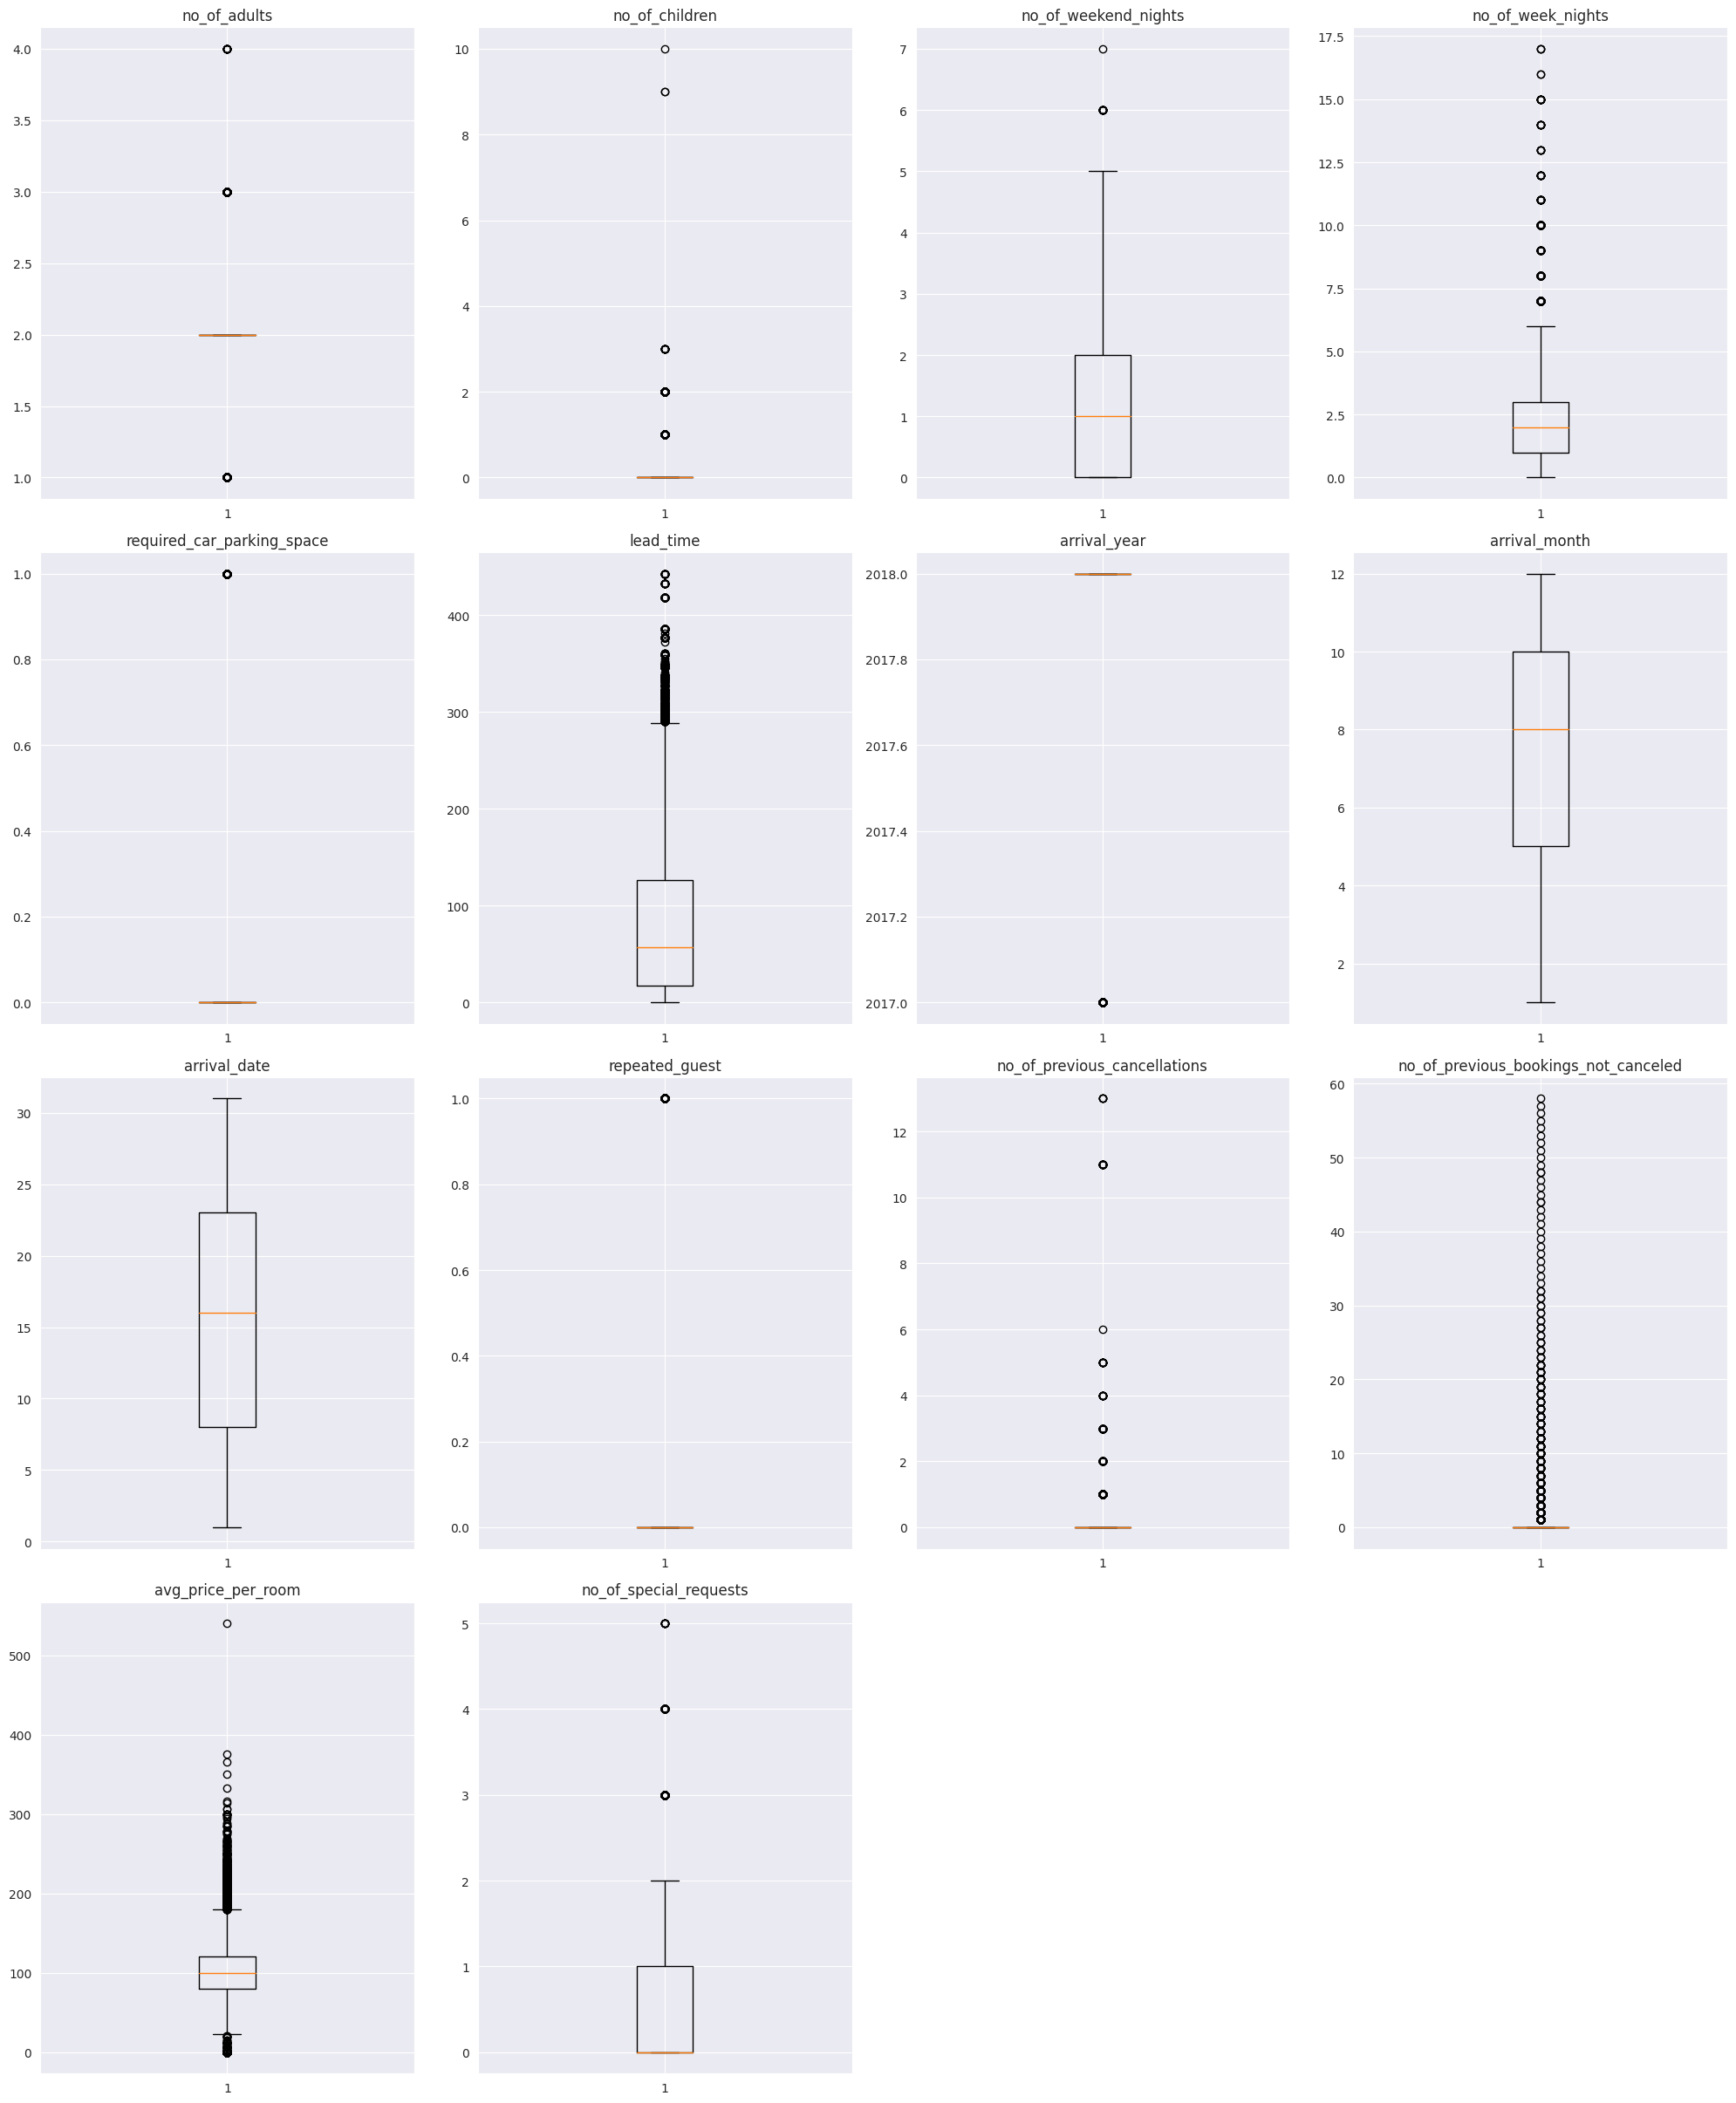

In [ ]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

There are major outliers in lead_time and avg_price_per_room. We will not be treating lead_time outliers as they could be valid cases.


In [ ]:
#Solving the IQR fro avg price room
quartiles = np.quantile(df['avg_price_per_room'][df['avg_price_per_room'].notnull()], [.25, .75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
outlier_powers = df.loc[np.abs(df['avg_price_per_room'] - df['avg_price_per_room'].median()) > power_4iqr, 'avg_price_per_room']
outlier_powers.shape

Q1 = 80.375, Q3 = 120.12, 4*IQR = 158.98000000000002


(49,)

In [ ]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

print(f'Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}')
# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
print("Upper_Whisker=",Upper_Whisker)

Q1 = 80.3, Q3 = 120.0, IQR = 39.7
Upper_Whisker= 179.55


In [ ]:
# assigning the outliers the value of upper whisker
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

### Feature Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36136 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36136 non-null  object 
 1   no_of_adults                          36136 non-null  int64  
 2   no_of_children                        36136 non-null  int64  
 3   no_of_weekend_nights                  36136 non-null  int64  
 4   no_of_week_nights                     36136 non-null  int64  
 5   type_of_meal_plan                     36136 non-null  object 
 6   required_car_parking_space            36136 non-null  int64  
 7   room_type_reserved                    36136 non-null  object 
 8   lead_time                             36136 non-null  int64  
 9   arrival_year                          36136 non-null  int64  
 10  arrival_month                         36136 non-null  int64  
 11  arrival_date        

* We want to predict the booking_status
* Before we proceed to build a model, we'll have to encode categorical features
* We'll split the data into train and test to be able to evaluate the model that we build on the train data

we need to encode below categorical features :
type_of_meal_plan
room_type_reserved
market_segment_type

In [ ]:
# New column for lenght of stay
df['stay_duration'] = df['no_of_weekend_nights'] + df['no_of_week_nights']

In [ ]:
# Create the 'isCanceled' column based on the 'bookingStats' column
df['Cancellation'] = df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  stay_duration  Cancellation  
0                       0   Not_Canceled              3             0  
1                       1   Not_Canceled              5             0  
2                       0       Canceled              3             1  
3                       0       Canceled              2             1  
4                       0       Canceled              2             1

In [ ]:
#Removing the below columns as we have created new columns for the same
df=df.drop(["booking_status"], axis=1)
df=df.drop(['no_of_weekend_nights'], axis=1)
df=df.drop(['no_of_week_nights'], axis=1)

#Removing the below column as dont have any significance
df=df.drop(["Booking_ID"], axis=1)

#df=df.drop(["arrival_year"], axis=1)
#df=df.drop(["arrival_date"], axis=1)
#df=df.drop(['required_car_parking_space'], axis=1)
#df=df.drop(['repeated_guest'], axis=1)

In [ ]:
df.head()

no_of_adults  no_of_children type_of_meal_plan  required_car_parking_space  \
0             2               0       Meal Plan 1                           0   
1             2               0      Not Selected                           0   
2             1               0       Meal Plan 1                           0   
3             2               0       Meal Plan 1                           0   
4             2               0      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  stay_duration  Cancellation  
0                       0              3             0  
1                       1              5             0  
2                       0              3             1  
3                       0              2             1  
4                       0              2             1

In [ ]:
df.shape

(36136, 17)

In [ ]:
# defining X and y variables

X = df.drop(["Cancellation"], axis=1)
y = df["Cancellation"]
X = pd.get_dummies(X, columns=["type_of_meal_plan", "room_type_reserved", "market_segment_type"], drop_first=True)
X = X.astype(float)

X_train, X_test, y_train, y_test = train_test_split(
X,
y,
test_size=0.30,
random_state=0

)

y_train.reset_index(inplace =True, drop =True)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test. shape)

print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))

print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25295, 26)
Shape of test set :  (10841, 26)
Percentage of classes in training set:
Cancellation
0    0.671911
1    0.328089
Name: proportion, dtype: float64
Percentage of classes in test set:
Cancellation
0    0.673277
1    0.326723
Name: proportion, dtype: float64


In [ ]:
#Scaling the X train and X test values
sc = StandardScaler()

X_train_scaled = pd. DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

####Model Builing

Creating functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

In [ ]:

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

### Model Building

In [ ]:
def model_performance(model, predictors, target):
  prob_pred = model.predict(predictors)
  class_pred = [1 if i >= 0.5 else 0 for i in prob_pred]
  acc = accuracy_score(target, class_pred) # to compute Accuracy
  recall = recall_score(target, class_pred) # to compute Recall
  precision = precision_score(target, class_pred) # to compute Precision
  f1 = f1_score(target, class_pred) # to compute F1-score

  # creating a dataframe of metrics
  df_perf = pd.DataFrame(
      {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
      index=[0],
  )
  return df_perf


#### Logistic Regression (with Statsmodel)



In [ ]:
#Adding constant to data for Logistic Regression
X_train_with_intercept = SM.add_constant(X_train_scaled)
X_test_with_intercept = SM.add_constant(X_test_scaled)

X_train_with_intercept.head()

const  no_of_adults  no_of_children  required_car_parking_space  lead_time  \
0    1.0      0.295289       -0.257359                    -0.17802  -0.227811   
1    1.0      0.295289       -0.257359                    -0.17802   0.293965   
2    1.0      0.295289       -0.257359                    -0.17802  -0.772777   
3    1.0      0.295289       -0.257359                    -0.17802   2.531804   
4    1.0      0.295289       -0.257359                    -0.17802  -0.830752   

   arrival_year  arrival_month  arrival_date  repeated_guest  \
0     -2.129841       0.846772     -0.756967       -0.159298   
1      0.469519       0.194089     -0.528012       -0.159298   
2     -2.129841       1.499454     -1.214876       -0.159298   
3      0.469519       1.173113     -1.443831       -0.159298   
4      0.469519      -1.763959     -1.329354       -0.159298   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                     -0.061759                             -0.086226   
1                     -0.061759                             -0.086226   
2                     -0.061759                             -0.086226   
3                     -0.061759                             -0.086226   
4                     -0.061759                             -0.086226   

   avg_price_per_room  no_of_special_requests  stay_duration  \
0           -0.817232               -0.787846      -0.009450   
1            0.689850               -0.787846      -0.567968   
2           -0.988491               -0.787846       1.107585   
3           -0.417627               -0.787846      -0.009450   
4            0.238867               -0.787846      -0.009450   

   type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
0                      -0.316489                      -0.012576   
1                      -0.316489                      -0.012576   
2                      -0.316489                      -0.012576   
3                      -0.316489                      -0.012576   
4                      -0.316489                      -0.012576   

   type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
0                         -0.4008                        -0.12595   
1                         -0.4008                        -0.12595   
2                         -0.4008                        -0.12595   
3                         -0.4008                        -0.12595   
4                         -0.4008                        -0.12595   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                       -0.010891                       -0.448942   
1                       -0.010891                        2.227461   
2                       -0.010891                       -0.448942   
3                       -0.010891                       -0.448942   
4                       -0.010891                       -0.448942   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                       -0.085835                       -0.166335   
1                       -0.085835                       -0.166335   
2                       -0.085835                       -0.166335   
3                       -0.085835                       -0.166335   
4                       -0.085835                       -0.166335   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                       -0.066689                          -0.101711   
1                       -0.066689                          -0.101711   
2                       -0.066689                          -0.101711   
3                       -0.066689                          -0.101711   
4                       14.994940                          -0.101711   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                      -0.242053                     1.554625   
1                      -0.242053                    -0.643242   
2                      -0.24205

In [ ]:
LogisticReg = SM.Logit(y_train, X_train_with_intercept).fit()
print(LogisticReg.summary())

         Current function value: 0.423337
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           Cancellation   No. Observations:                25295
Model:                          Logit   Df Residuals:                    25268
Method:                           MLE   Df Model:                           26
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                  0.3310
Time:                        17:58:20   Log-Likelihood:                -10708.
converged:                      False   LL-Null:                       -16007.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.5968    736.111     -0.002      0.998   -1444.349

In [ ]:
#Checking Logistic Regression model performance on training set

y_pred = LogisticReg.predict(X_train_with_intercept)
y_pred.head()


0    0.067675
1    0.744609
2    0.161470
3    0.971973
4    0.081148
dtype: float64

In [ ]:
# Fit the Logistic Regression model
log_model = LogisticRegression(max_iter=10000,penalty='none',verbose=True,n_jobs =- 1)
log_model. fit(X_train_with_intercept, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(max_iter=10000, n_jobs=-1, penalty='none', verbose=True)

In [ ]:
y_train_predict = log_model.predict(X_train_with_intercept)
y_test_predict = log_model.predict(X_test_with_intercept)


####Checking Logistic Regression model performance on train set

In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     16996
           1       0.74      0.63      0.68      8299

    accuracy                           0.81     25295
   macro avg       0.79      0.76      0.77     25295
weighted avg       0.80      0.81      0.80     25295



In [ ]:
cm =confusion_matrix(y_train, y_train_predict)
cm

array([[15157,  1839],
       [ 3035,  5264]])

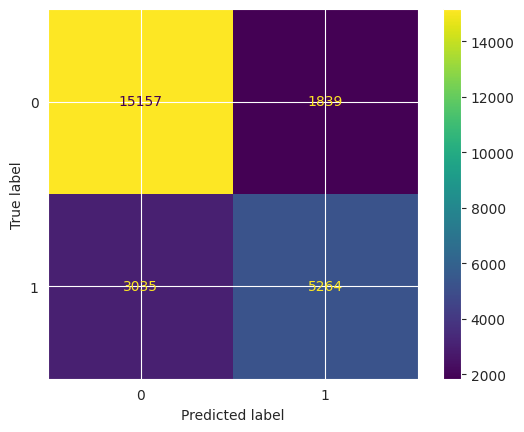

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                              display_labels=log_model.classes_
)
disp.plot()
plt.show()

In [ ]:
logistic_reg_perf_train = model_performance(
    LogisticReg, X_train_with_intercept, y_train
)
logistic_reg_perf_train

Accuracy    Recall  Precision        F1
0  0.807314  0.634293   0.741095  0.683548

####Checking Logistic Regression model performance on test set



In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      7299
           1       0.74      0.62      0.67      3542

    accuracy                           0.80     10841
   macro avg       0.78      0.76      0.77     10841
weighted avg       0.80      0.80      0.80     10841



In [ ]:
cm =confusion_matrix(y_test, y_test_predict)
cm

array([[6515,  784],
       [1348, 2194]])

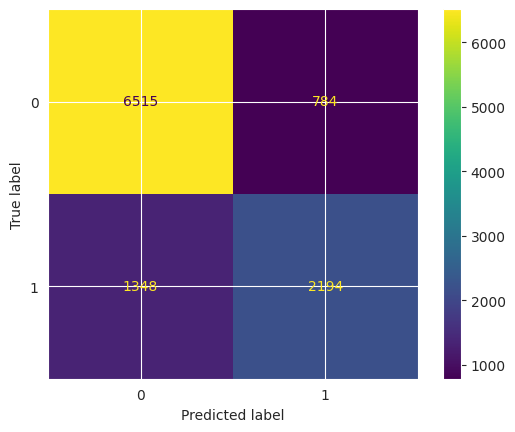

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                              display_labels=log_model.classes_
)
disp.plot()
plt.show()

In [ ]:
logistic_reg_perf_test = model_performance(
    LogisticReg, X_test_with_intercept, y_test
)
logistic_reg_perf_test

Accuracy    Recall  Precision        F1
0  0.803339  0.619424   0.736736  0.673006

####Naive - Bayes Classifier



In [ ]:
#Build Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

####Checking Naive - Bayes Classifier performance on training set


In [ ]:

y_train_predict = nb_model.predict(X_train_scaled)
y_test_predict =nb_model.predict(X_test_scaled)

model_score = nb_model.score(X_train_scaled, y_train)
print(model_score)

0.40790670092903736


In [ ]:
cm =confusion_matrix(y_train, y_train_predict)
cm

array([[ 2323, 14673],
       [  304,  7995]])

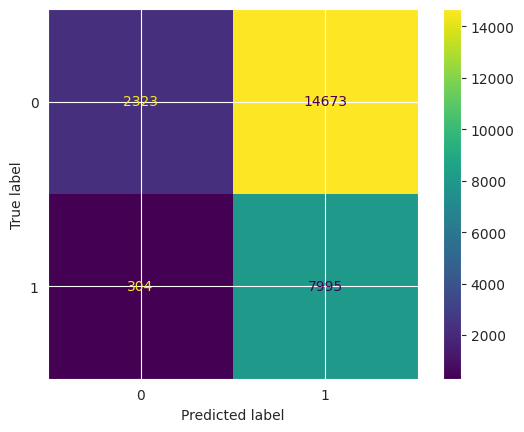

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                              display_labels=nb_model.classes_
)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.88      0.14      0.24     16996
           1       0.35      0.96      0.52      8299

    accuracy                           0.41     25295
   macro avg       0.62      0.55      0.38     25295
weighted avg       0.71      0.41      0.33     25295



In [ ]:
nb_perf_train = model_performance(
    nb_model, X_train_scaled, y_train
)
nb_perf_train


Accuracy    Recall  Precision        F1
0  0.407907  0.963369     0.3527  0.516356

#### Checking Naive - Bayes Classifier performance on test set

In [ ]:
model_score = nb_model.score(X_test_scaled, y_test)
print(model_score)

0.41066322294991237


In [ ]:
cm =confusion_matrix(y_test, y_test_predict)
cm

array([[1036, 6263],
       [ 126, 3416]])

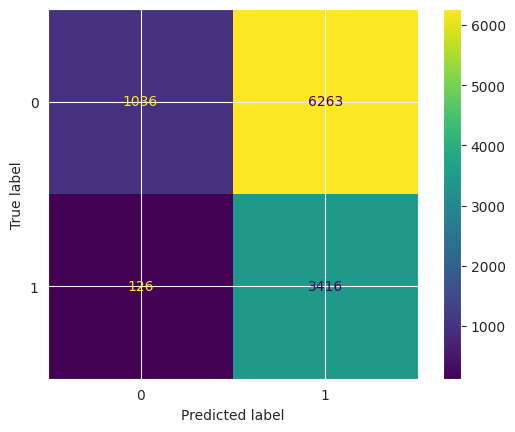

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                              display_labels=nb_model.classes_
)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.89      0.14      0.24      7299
           1       0.35      0.96      0.52      3542

    accuracy                           0.41     10841
   macro avg       0.62      0.55      0.38     10841
weighted avg       0.72      0.41      0.33     10841



In [ ]:
nb_perf_test = model_performance(
    nb_model, X_test_scaled, y_test
)
nb_perf_test


Accuracy    Recall  Precision        F1
0  0.410663  0.964427   0.352929  0.516754

####KNN Classifier (K = 3)



In [ ]:
#Build KNN Model
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

####Checking KNN Classifier performance on training set

In [ ]:

y_train_predict = knn_model.predict(X_train_scaled)
y_test_predict =knn_model.predict(X_test_scaled)

model_score = knn_model.score(X_train_scaled, y_train)
print(model_score)

0.9180470448705278


In [ ]:
cm =confusion_matrix(y_train, y_train_predict)
cm

array([[16071,   925],
       [ 1148,  7151]])

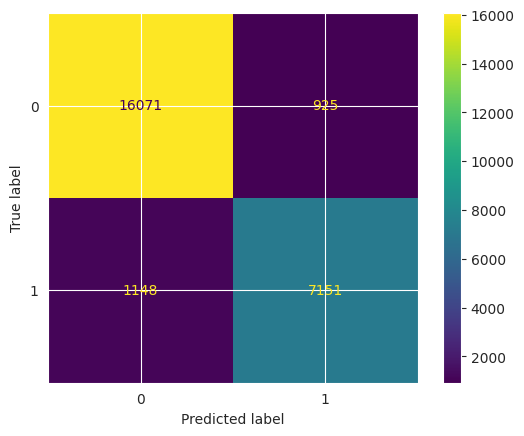

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                              display_labels=knn_model.classes_
)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     16996
           1       0.89      0.86      0.87      8299

    accuracy                           0.92     25295
   macro avg       0.91      0.90      0.91     25295
weighted avg       0.92      0.92      0.92     25295



In [ ]:
knn_perf_train = model_performance(
    knn_model, X_train_scaled, y_train
)
knn_perf_train


Accuracy   Recall  Precision        F1
0  0.918047  0.86167   0.885463  0.873405

####Checking KNN Classifier performance on test set

In [ ]:
model_score = knn_model.score(X_test_scaled, y_test)
print(model_score)

0.8439258370998985


In [ ]:
cm =confusion_matrix(y_test, y_test_predict)
cm

array([[6520,  779],
       [ 913, 2629]])

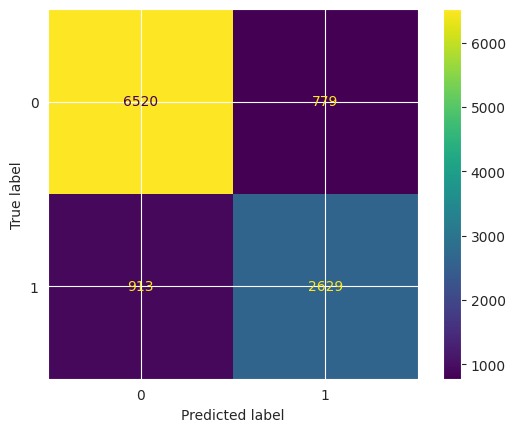

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                              display_labels=knn_model.classes_
)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      7299
           1       0.77      0.74      0.76      3542

    accuracy                           0.84     10841
   macro avg       0.82      0.82      0.82     10841
weighted avg       0.84      0.84      0.84     10841



In [ ]:
knn_perf_test = model_performance(
    knn_model, X_test_scaled, y_test
)
knn_perf_test


Accuracy    Recall  Precision        F1
0  0.843926  0.742236    0.77142  0.756547

The KNN Classifier performs considerably better than the Logistic Regression and the Naive Bayes model



####Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

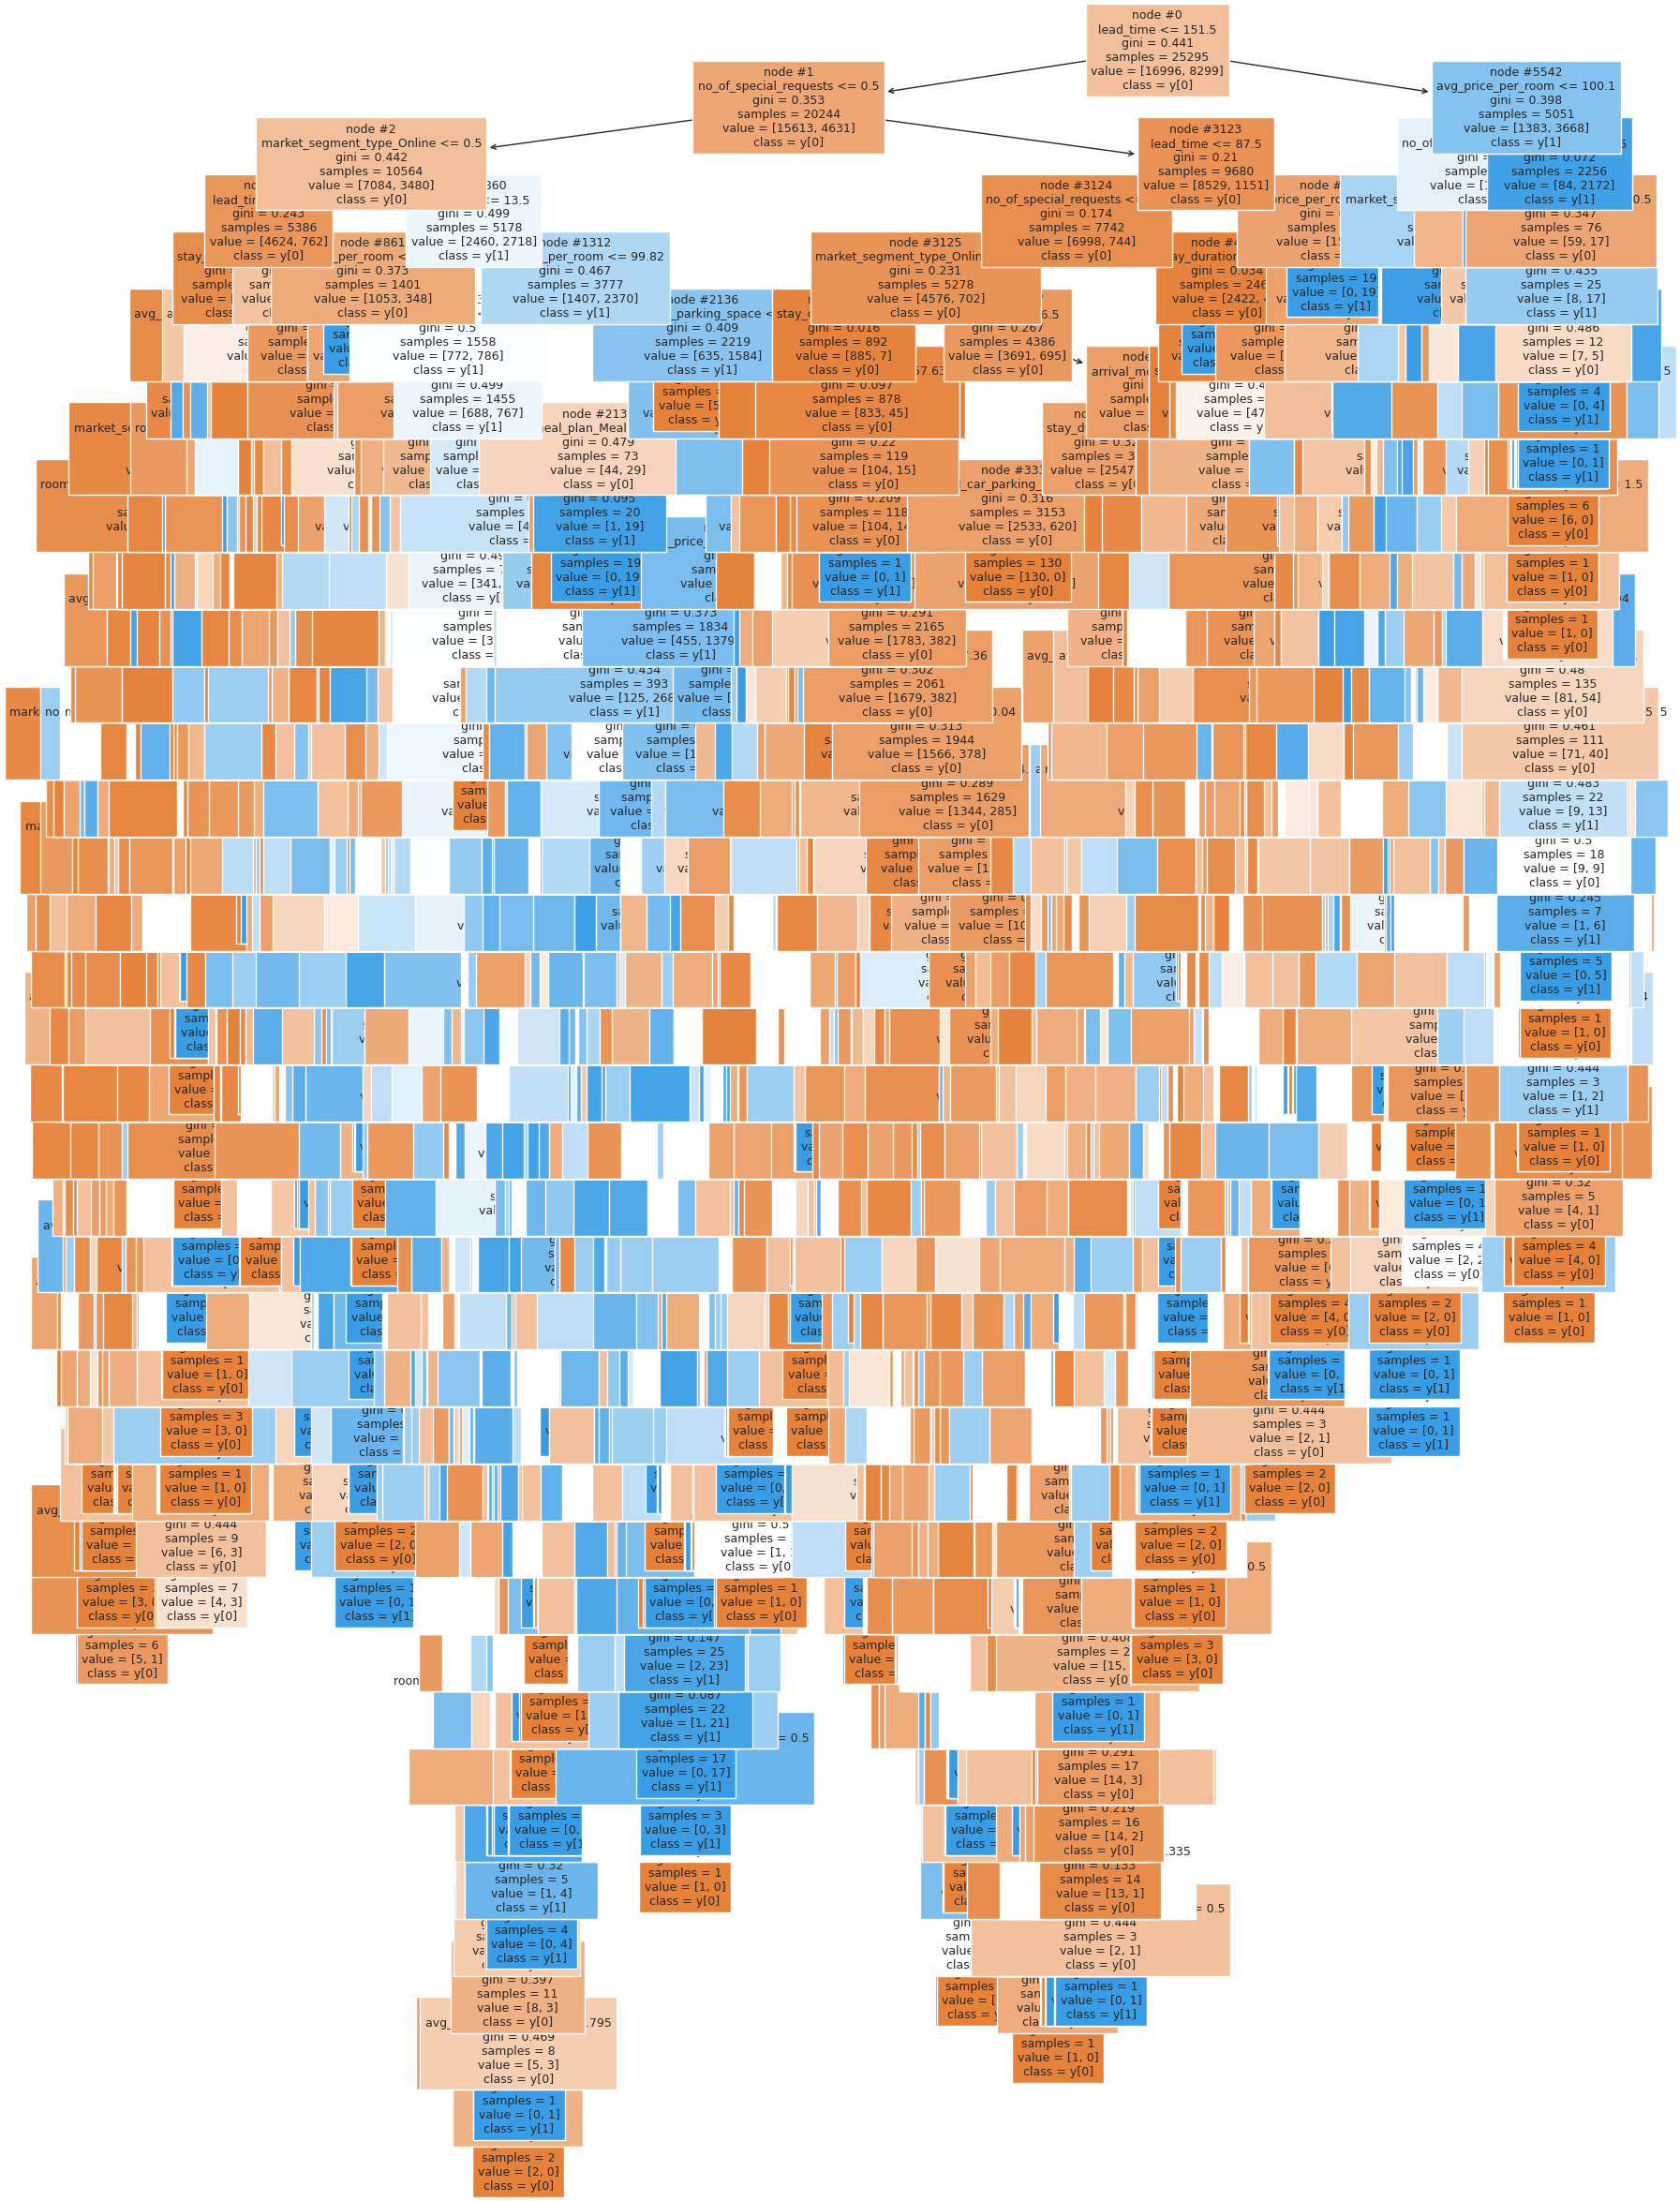

In [ ]:
#Code for plotting the Decision Tree Model

plt.figure(figsize=(20,30))
tree.plot_tree(dt_model,feature_names=X_train.columns,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dt_model,feature_names=X_train.columns,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- stay_duration <= 5.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- lead_time <= 74.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 18
|   |   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [228.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- lead_time >  16.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 135.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of de

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.351913
avg_price_per_room                    0.183999
arrival_date                          0.095747
market_segment_type_Online            0.093308
no_of_special_requests                0.069219
arrival_month                         0.067769
stay_duration                         0.056586
no_of_adults                          0.027476
arrival_year                          0.011862
room_type_reserved_Room_Type 4        0.008187
type_of_meal_plan_Not Selected        0.007187
required_car_parking_space            0.006832
no_of_children                        0.005894
type_of_meal_plan_Meal Plan 2         0.005476
market_segment_type_Offline           0.003374
room_type_reserved_Room_Type 5        0.001542
room_type_reserved_Room_Type 2        0.001122
market_segment_type_Corporate         0.000560
repeated_guest                        0.000547
room_type_reserved_Room_Type 6        0.000466
no_of_previou

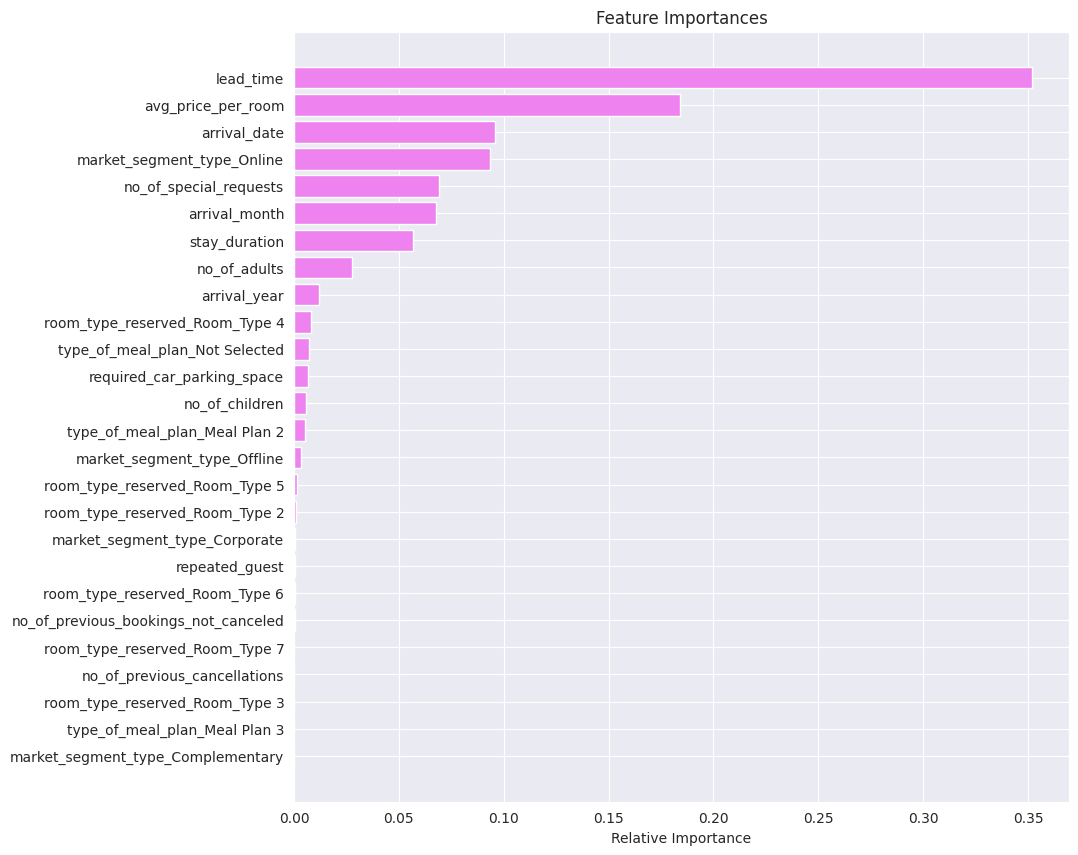

In [ ]:
importances = dt_model.feature_importances_
indices = np.argsort(importances)
feature_names=X_train.columns

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

####Checking Decision Tree Classifier performance on training set


In [ ]:

y_train_predict = dt_model.predict(X_train)
y_test_predict = dt_model.predict(X_test)

model_score = dt_model.score(X_train, y_train)
print(model_score)

0.9941885748171575


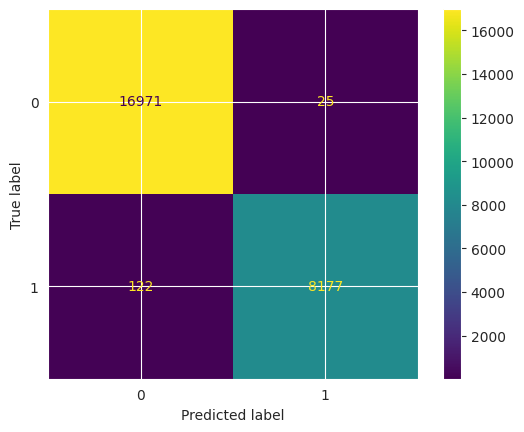

In [ ]:
cm = confusion_matrix(y_train, y_train_predict)

disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                              display_labels=dt_model.classes_

)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     16996
           1       1.00      0.99      0.99      8299

    accuracy                           0.99     25295
   macro avg       0.99      0.99      0.99     25295
weighted avg       0.99      0.99      0.99     25295



In [ ]:
decision_tree_perf_train = model_performance(
    dt_model, X_train, y_train
)
decision_tree_perf_train


Accuracy    Recall  Precision        F1
0  0.994189  0.985299   0.996952  0.991091

* Almost 0 errors on the training set, each sample has been classified correctly.
* Model has performed very well on the training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* Let's check the performance on test data to see if the model is overfitting.

####Checking Decision Tree Classifier performance on test set

In [ ]:

model_score = dt_model.score(X_test, y_test)
print(model_score)

0.8618208652338345


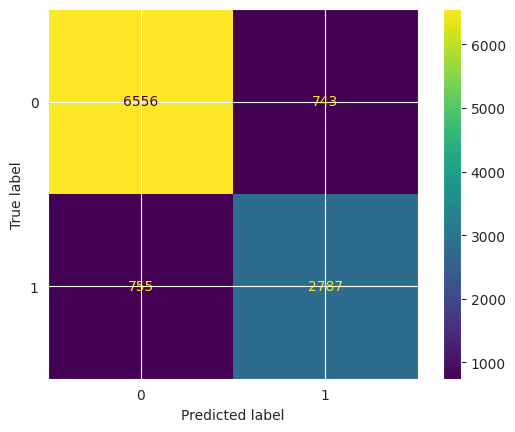

In [ ]:
cm = confusion_matrix(y_test, y_test_predict)

disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                              display_labels=dt_model.classes_

)

disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7299
           1       0.79      0.79      0.79      3542

    accuracy                           0.86     10841
   macro avg       0.84      0.84      0.84     10841
weighted avg       0.86      0.86      0.86     10841



In [ ]:
decision_tree_perf_test = model_performance(
    dt_model, X_test, y_test
)
decision_tree_perf_test


Accuracy    Recall  Precision        F1
0  0.861821  0.786844   0.789518  0.788179

* The decision tree model is overfitting the data as expected and not able to generalize well on the test set.
* We will have to prune the decision tree.

###Model Performance Improvement



####Logistic Regression (deal with multicollinearity, remove high p-value variables,determine optimal thrashold using ROCcurve)



####Logistic Regression - Dealing with Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Lets create a list of VIF
vif_list=[]
for i in range(X_train_with_intercept.shape[1]):
  vif_list.append(variance_inflation_factor(X_train_with_intercept.values,i))

pd.DataFrame({'Features':X_train_with_intercept.columns, "VIF":vif_list}).sort_values(by="VIF",ascending=False)

Features        VIF
26            market_segment_type_Online  65.986993
25           market_segment_type_Offline  59.648256
24         market_segment_type_Corporate  15.699972
23     market_segment_type_Complementary   4.103132
21        room_type_reserved_Room_Type 6   2.166888
2                         no_of_children   2.165803
11                    avg_price_per_room   2.053986
8                         repeated_guest   1.774948
10  no_of_previous_bookings_not_canceled   1.578089
5                           arrival_year   1.432572
4                              lead_time   1.385695
19        room_type_reserved_Room_Type 4   1.375231
1                           no_of_adults   1.336867
9           no_of_previous_cancellations   1.312874
6                          arrival_month   1.275130
16        type_of_meal_plan_Not Selected   1.270209
14         type_of_meal_plan_Meal Plan 2   1.266878
12                no_of_special_requests   1.251940
22        room_type_reserved_Room_Type 7   1.110697
13                         stay_duration   1.101255
3             required_car_parking_space   1.034707
17        room_type_reserved_Room_Type 2   1.030580
20        room_type_reserved_Room_Type 5   1.027893
15         type_of_meal_plan_Meal Plan 3   1.017188
7                           arrival_date   1.006375
18        room_type_reserved_Room_Type 3   1.001702
0                                  const   1.000000

####Dropping market_segment_type_Online with VIF=65

In [ ]:
X_train1_with_intercept= X_train_with_intercept.drop(["market_segment_type_Online"],axis=1)
X_test1_with_intercept= X_test_with_intercept.drop(["market_segment_type_Online"],axis=1)

In [ ]:
LogisticReg1 = SM.Logit(y_train, X_train1_with_intercept).fit()
print(LogisticReg1.summary())

         Current function value: 0.423340
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           Cancellation   No. Observations:                25295
Model:                          Logit   Df Residuals:                    25269
Method:                           MLE   Df Model:                           25
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                  0.3310
Time:                        19:35:01   Log-Likelihood:                -10708.
converged:                      False   LL-Null:                       -16007.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.6314   1735.200     -0.001      0.999   -3402.560

In [ ]:
vif_list=[]
for i in range(X_train1_with_intercept.shape[1]):
  vif_list.append(variance_inflation_factor(X_train1_with_intercept.values,i))

pd.DataFrame({'Features':X_train1_with_intercept.columns, "VIF":vif_list}).sort_values(by="VIF",ascending=False)

Features       VIF
21        room_type_reserved_Room_Type 6  2.166752
2                         no_of_children  2.165520
11                    avg_price_per_room  2.053118
8                         repeated_guest  1.771718
25           market_segment_type_Offline  1.599796
10  no_of_previous_bookings_not_canceled  1.577768
24         market_segment_type_Corporate  1.500805
5                           arrival_year  1.429927
4                              lead_time  1.380818
19        room_type_reserved_Room_Type 4  1.369960
23     market_segment_type_Complementary  1.346558
1                           no_of_adults  1.318892
9           no_of_previous_cancellations  1.312728
6                          arrival_month  1.274222
16        type_of_meal_plan_Not Selected  1.268327
14         type_of_meal_plan_Meal Plan 2  1.266455
12                no_of_special_requests  1.246888
22        room_type_reserved_Room_Type 7  1.110581
13                         stay_duration  1.099172
3             required_car_parking_space  1.034686
17        room_type_reserved_Room_Type 2  1.030567
20        room_type_reserved_Room_Type 5  1.027892
15         type_of_meal_plan_Meal Plan 3  1.017187
7                           arrival_date  1.006372
18        room_type_reserved_Room_Type 3  1.001702
0                                  const  1.000000

####Dealing with high p-value variables


In [ ]:
LogisticReg = SM.Logit(y_train, X_train1_with_intercept).fit()
print(LogisticReg.summary())

         Current function value: 0.423340
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           Cancellation   No. Observations:                25295
Model:                          Logit   Df Residuals:                    25269
Method:                           MLE   Df Model:                           25
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                  0.3310
Time:                        19:52:30   Log-Likelihood:                -10708.
converged:                      False   LL-Null:                       -16007.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.6314   1735.200     -0.001      0.999   -3402.560

In [ ]:
#Checking p values
p_values = LogisticReg.pvalues.sort_values(ascending=False)
p_values

type_of_meal_plan_Meal Plan 3            9.998400e-01
market_segment_type_Complementary        9.997942e-01
const                                    9.992498e-01
room_type_reserved_Room_Type 3           9.716465e-01
arrival_date                             3.359312e-01
no_of_previous_bookings_not_canceled     2.544745e-01
no_of_adults                             1.795861e-01
no_of_children                           1.028389e-01
type_of_meal_plan_Meal Plan 2            9.500369e-02
room_type_reserved_Room_Type 2           2.657003e-02
repeated_guest                           8.668966e-04
no_of_previous_cancellations             8.581943e-04
room_type_reserved_Room_Type 5           1.169651e-04
room_type_reserved_Room_Type 7           1.979487e-05
room_type_reserved_Room_Type 4           1.966167e-05
type_of_meal_plan_Not Selected           1.791329e-05
room_type_reserved_Room_Type 6           1.881621e-08
arrival_month                            1.379013e-10
stay_duration                            6.057143e-11
arrival_year                             3.758903e-12
market_segment_type_Corporate            3.954998e-18
required_car_parking_space               2.112151e-30
avg_price_per_room                      1.022950e-137
market_segment_type_Offline             3.079071e-261
no_of_special_requests                   0.000000e+00
lead_time                                0.000000e+00
dtype: float64

In [ ]:
selected_features = p_values[p_values <= 0.05].index
selected_features

Index(['room_type_reserved_Room_Type 2', 'repeated_guest',
       'no_of_previous_cancellations', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 7', 'room_type_reserved_Room_Type 4',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 6',
       'arrival_month', 'stay_duration', 'arrival_year',
       'market_segment_type_Corporate', 'required_car_parking_space',
       'avg_price_per_room', 'market_segment_type_Offline',
       'no_of_special_requests', 'lead_time'],
      dtype='object')

In [ ]:
X_train_significant = X_train1_with_intercept[selected_features]

X_test_significant = X_test_with_intercept[selected_features]

X_train_significant.head()

room_type_reserved_Room_Type 2  repeated_guest  \
0                        -0.12595       -0.159298   
1                        -0.12595       -0.159298   
2                        -0.12595       -0.159298   
3                        -0.12595       -0.159298   
4                        -0.12595       -0.159298   

   no_of_previous_cancellations  room_type_reserved_Room_Type 5  \
0                     -0.061759                       -0.085835   
1                     -0.061759                       -0.085835   
2                     -0.061759                       -0.085835   
3                     -0.061759                       -0.085835   
4                     -0.061759                       -0.085835   

   room_type_reserved_Room_Type 7  room_type_reserved_Room_Type 4  \
0                       -0.066689                       -0.448942   
1                       -0.066689                        2.227461   
2                       -0.066689                       -0.448942   
3                       -0.066689                       -0.448942   
4                       14.994940                       -0.448942   

   type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 6  \
0                         -0.4008                       -0.166335   
1                         -0.4008                       -0.166335   
2                         -0.4008                       -0.166335   
3                         -0.4008                       -0.166335   
4                         -0.4008                       -0.166335   

   arrival_month  stay_duration  arrival_year  market_segment_type_Corporate  \
0       0.846772      -0.009450     -2.129841                      -0.242053   
1       0.194089      -0.567968      0.469519                      -0.242053   
2       1.499454       1.107585     -2.129841                      -0.242053   
3       1.173113      -0.009450      0.469519                      -0.242053   
4      -1.763959      -0.009450      0.469519                       4.131326   

   required_car_parking_space  avg_price_per_room  \
0                    -0.17802           -0.817232   
1                    -0.17802            0.689850   
2                    -0.17802           -0.988491   
3                    -0.17802           -0.417627   
4                    -0.17802            0.238867   

   market_segment_type_Offline  no_of_special_requests  lead_time  
0                     1.554625               -0.787846  -0.227811  
1                    -0.643242               -0.787846   0.293965  
2                    -0.643242               -0.787846  -0.772777  
3                    -0.643242               -0.787846   2.531804  
4                    -0.643242               -0.787846  -0.830752

####Training the Logistic Regression model again with only the significant features



In [ ]:
LogisticReg_tuned = SM.Logit(y_train, X_train_significant).fit()
print(LogisticReg_tuned.summary())

Optimization terminated successfully.
         Current function value: 0.508465
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Cancellation   No. Observations:                25295
Model:                          Logit   Df Residuals:                    25278
Method:                           MLE   Df Model:                           16
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                  0.1965
Time:                        19:54:10   Log-Likelihood:                -12862.
converged:                       True   LL-Null:                       -16007.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
room_type_reserved_Room_Type 2    -0.0296      0.016     -1.871     

Still seeing p-values >0.05.

####Determining optimal threshold using ROC Curve

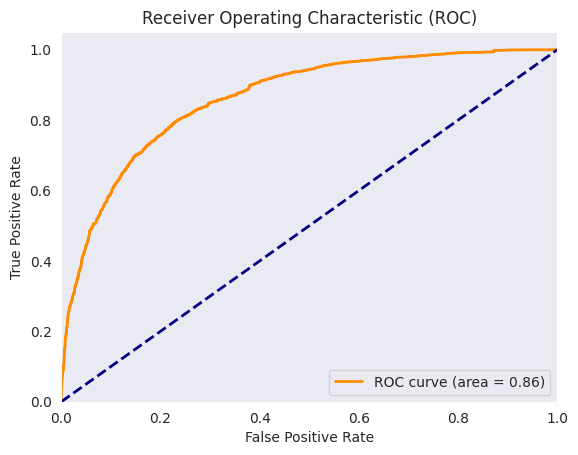

In [ ]:
y_pred = LogisticReg_tuned.predict(X_train_significant)
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

# Plot ROC curve
roc_auc = roc_auc_score(y_train, y_pred)
plt. figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt. show()

####Checking tuned Logistic Regression model performance on training set



In [ ]:
LogisticReg_tuned_sk = LogisticRegression(max_iter=10000,penalty='none',verbose=True,n_jobs =- 1)
LogisticReg_tuned_sk.fit(X_train_significant, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(max_iter=10000, n_jobs=-1, penalty='none', verbose=True)

In [ ]:
y_train_predict = LogisticReg_tuned_sk.predict(X_train_significant)
y_test_predict = LogisticReg_tuned_sk.predict(X_test_significant)

In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     16996
           1       0.74      0.64      0.69      8299

    accuracy                           0.81     25295
   macro avg       0.79      0.76      0.77     25295
weighted avg       0.80      0.81      0.80     25295



In [ ]:
cm = confusion_matrix(y_train, y_train_predict)
cm

array([[15154,  1842],
       [ 3014,  5285]])

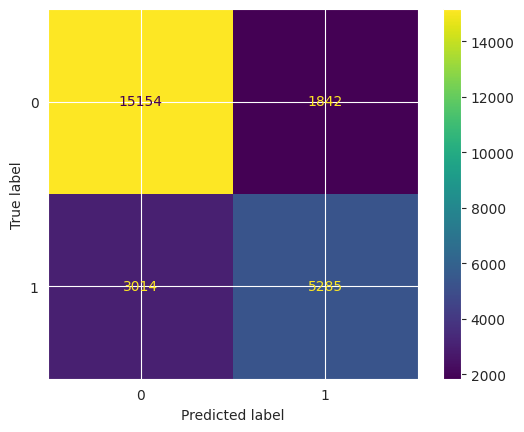

In [ ]:
cm = confusion_matrix(y_train, y_train_predict)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,
display_labels=LogisticReg_tuned_sk.classes_

)
disp.plot()
plt.show()

In [ ]:
logistic_reg_tune_perf_train = model_performance(
LogisticReg_tuned, X_train_significant, y_train
)
logistic_reg_tune_perf_train



Accuracy    Recall  Precision        F1
0  0.761218  0.827329   0.598449  0.694517

####Checking tuned Logistic Regression model performance on test set

In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      7299
           1       0.74      0.62      0.67      3542

    accuracy                           0.80     10841
   macro avg       0.78      0.76      0.77     10841
weighted avg       0.80      0.80      0.80     10841



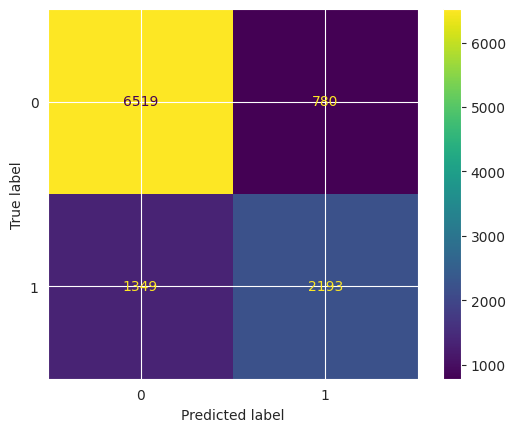

In [ ]:
cm = confusion_matrix(y_test, y_test_predict)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,
display_labels=LogisticReg_tuned_sk.classes_

)
disp.plot()
plt.show()

In [ ]:
logistic_reg_tune_perf_test = model_performance(
LogisticReg_tuned, X_test_significant, y_test
)
logistic_reg_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.758602  0.821287   0.594523  0.689745

The performance of the Logistic Regression model has improved considerably (on both training and test sets) by
dropping variables with high p-values and setting an optimal threshold.



####KNN Classifier (different values of K)

####KNN Classifier Performance Improvement using different k values

In [ ]:
# empty list that will hold accuracy scores
ac_scores = []
recall_scores=[]
MCE = []

# perform accuracy metrics for values from 1,3,5 .... 19
for k in range(2,21,1):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn. fit(X_train_scaled, y_train)
  # evaluate test accuracy
  scores = knn. score(X_test_scaled, y_test)
  ac_scores. append(scores)
  MCE. append(1-scores)

  recall = recall_score(y_test, knn.predict(X_test_scaled))
  recall_scores.append(recall)

  # changing to misclassification error
  # MCE = [1 - x for x in ac_scores]

  print(f'score for k={k}: {scores}')
  print(f'Recall for k={k}: {recall}')
  # write code to give a space after the above result

  print()

score for k=2: 0.8453094732958214
Recall for k=2: 0.6366459627329193

score for k=3: 0.8439258370998985
Recall for k=3: 0.7422360248447205

score for k=4: 0.8454939581219445
Recall for k=4: 0.663184641445511

score for k=5: 0.8478922608615441
Recall for k=5: 0.7343308865047995

score for k=6: 0.8469698367309288
Recall for k=6: 0.6744776962168266

score for k=7: 0.8482612305137902
Recall for k=7: 0.7300959909655562

score for k=8: 0.845586200535006
Recall for k=8: 0.6815358554488989

score for k=9: 0.8450327460566368
Recall for k=9: 0.7224731789949181

score for k=10: 0.84401807951296
Recall for k=10: 0.6843591191417279

score for k=11: 0.84401807951296
Recall for k=11: 0.7210615471485037

score for k=12: 0.8427266857300987
Recall for k=12: 0.6880293619424054

score for k=13: 0.8416197767733604
Recall for k=13: 0.7140033879164314

score for k=14: 0.8391292316206992
Recall for k=14: 0.6826651609260305

score for k=15: 0.8390369892076377
Recall for k=15: 0.7100508187464709

score for k=16

In [ ]:
knn_tuned = KNeighborsClassifier(n_neighbors=3)
knn_tuned. fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

####Checking tuned KNN model performance on training set



In [ ]:
y_train_predict = knn_tuned.predict(X_train_scaled)
y_test_predict = knn_tuned.predict(X_test_scaled)

In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     16996
           1       0.89      0.86      0.87      8299

    accuracy                           0.92     25295
   macro avg       0.91      0.90      0.91     25295
weighted avg       0.92      0.92      0.92     25295



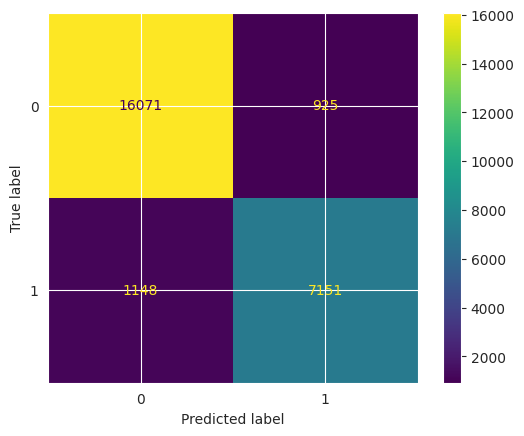

In [ ]:
cm = confusion_matrix(y_train, y_train_predict)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels=knn_tuned.classes_
)
disp.plot()
plt.show()

In [ ]:
knn_tuned_perf_train = model_performance(
knn_tuned, X_train_scaled, y_train
)
knn_tuned_perf_train



Accuracy   Recall  Precision        F1
0  0.918047  0.86167   0.885463  0.873405

####Checking tuned KNN model performance on test set

In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      7299
           1       0.77      0.74      0.76      3542

    accuracy                           0.84     10841
   macro avg       0.82      0.82      0.82     10841
weighted avg       0.84      0.84      0.84     10841



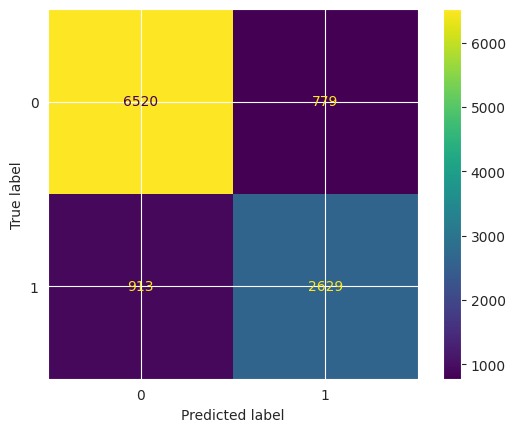

In [ ]:
cm = confusion_matrix(y_test, y_test_predict)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels=knn_tuned.classes_
)
disp.plot()
plt.show()

In [ ]:
knn_tuned_perf_test = model_performance(
knn_tuned, X_test_scaled, y_test
)
knn_tuned_perf_test



Accuracy    Recall  Precision        F1
0  0.843926  0.742236    0.77142  0.756547

####Decision Tree Classifier (Pruning)


In [ ]:
####pruning the tree

# Choose the type of classifier.
dt_model_tuned_1 = DecisionTreeClassifier(random_state=42)
# Grid of parameters to choose from
parameters = {
"max_depth": np.arange(5, 13, 2),               ## Max Depth of the decision tree
"max_leaf_nodes": [10, 20, 40, 50, 75, 100],    ## Maximum number of leaf nodes
"min_samples_split": [2, 5,7,10,20,30],        ## Minimum number of samples required to split
"class_weight": ['balanced', None]             ## whether or not to used balanced weights

}



# Run the grid search
grid_obj = GridSearchCV(dt_model_tuned_1, parameters, scoring='recall', cv=5,n_jobs =- 1)
grid_obj = grid_obj. fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt_model_tuned_1 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dt_model_tuned_1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=11,
                       max_leaf_nodes=100, min_samples_split=10,
                       random_state=42)

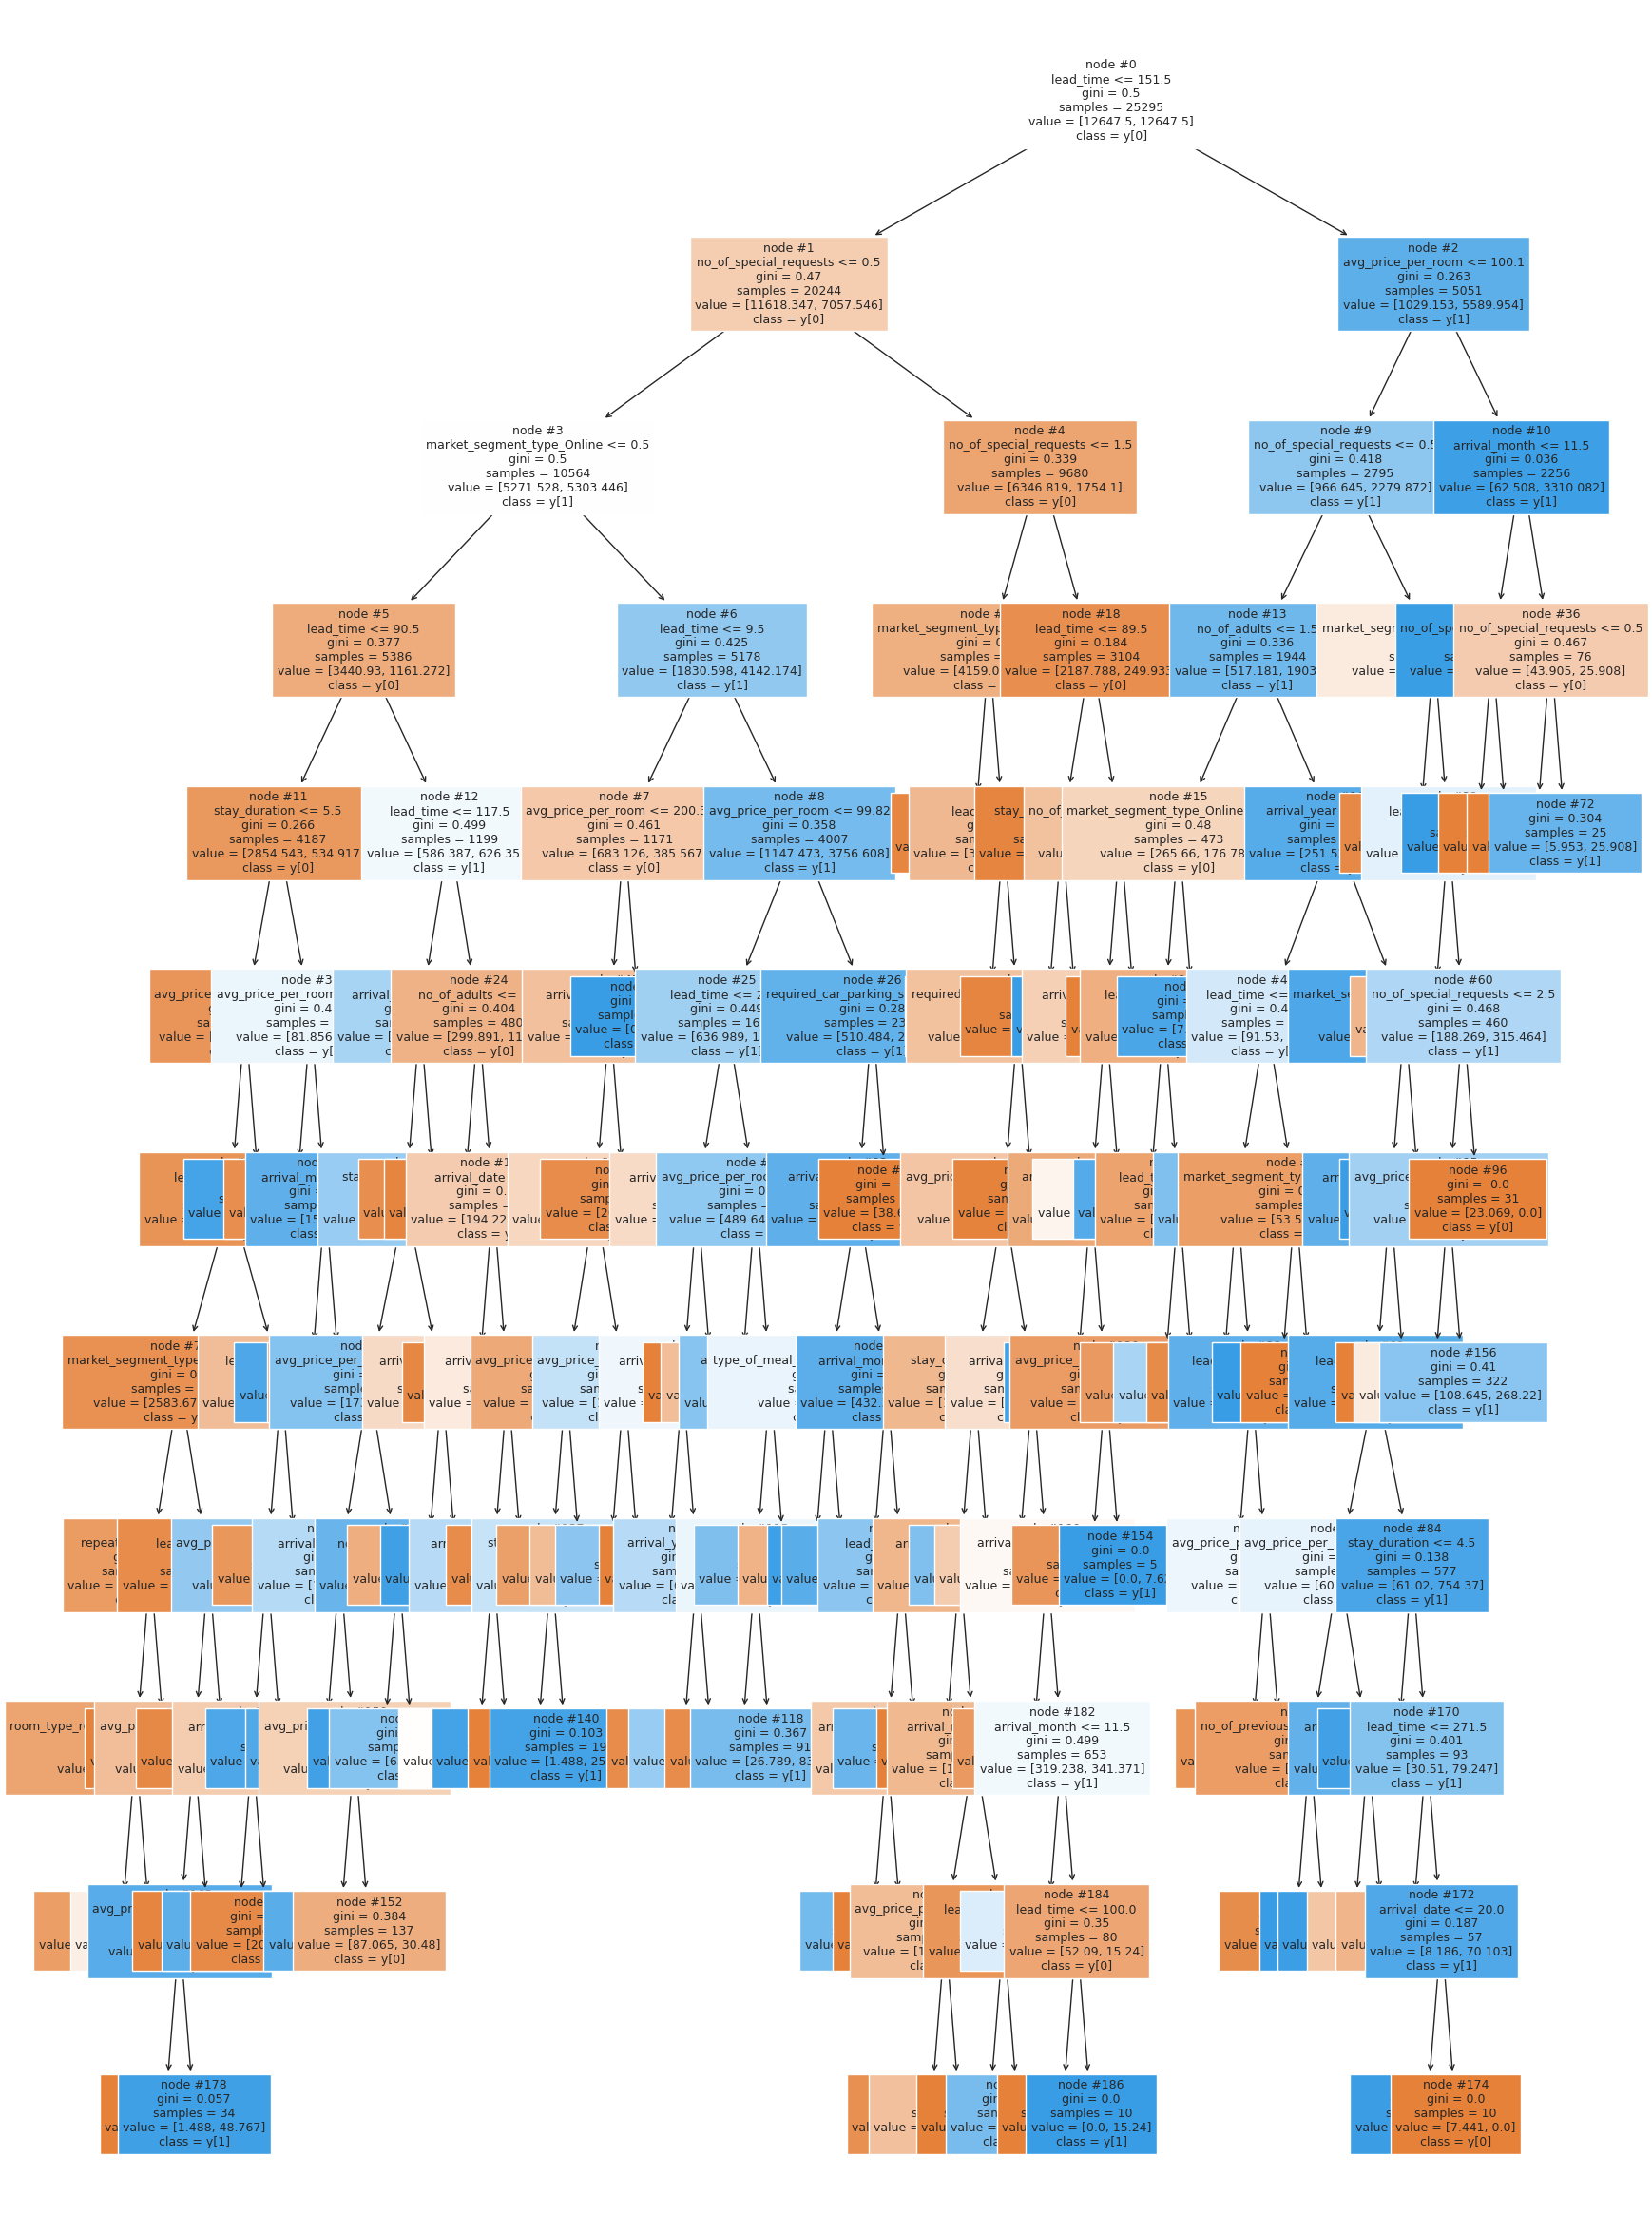

In [ ]:
#Code for plotting the Decision Tree Model

plt.figure(figsize=(20,30))
tree.plot_tree(dt_model_tuned_1,feature_names=X_train.columns,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model_tuned_1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.447737
market_segment_type_Online            0.168732
no_of_special_requests                0.144274
avg_price_per_room                    0.095988
arrival_month                         0.044013
no_of_adults                          0.025640
stay_duration                         0.017225
arrival_date                          0.017044
arrival_year                          0.016197
required_car_parking_space            0.011786
market_segment_type_Offline           0.004110
type_of_meal_plan_Meal Plan 2         0.002484
repeated_guest                        0.001893
room_type_reserved_Room_Type 4        0.001642
no_of_previous_cancellations          0.001235
no_of_previous_bookings_not_canceled  0.000000
no_of_children                        0.000000
type_of_meal_plan_Meal Plan 3         0.000000
type_of_meal_plan_Not Selected        0.000000
room_type_reserved_Room_Type 3        0.000000
room_type_res

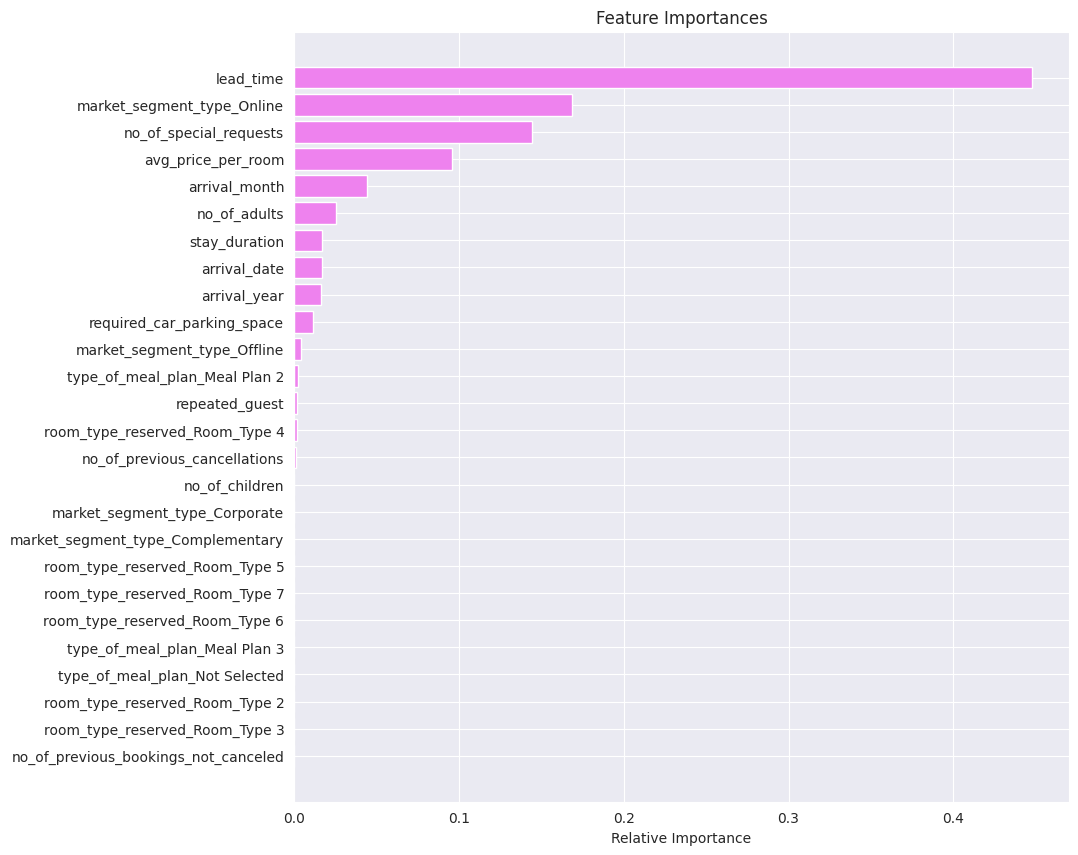

In [ ]:
importances = dt_model_tuned_1.feature_importances_
indices = np.argsort(importances)
feature_names=X_train.columns

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

####Checking pre-pruned Decision Tree Classifier performance on training set


In [ ]:
y_train_predict = dt_model_tuned_1.predict(X_train)
y_test_predict = dt_model_tuned_1.predict(X_test)

In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90     16996
           1       0.78      0.83      0.80      8299

    accuracy                           0.87     25295
   macro avg       0.84      0.86      0.85     25295
weighted avg       0.87      0.87      0.87     25295



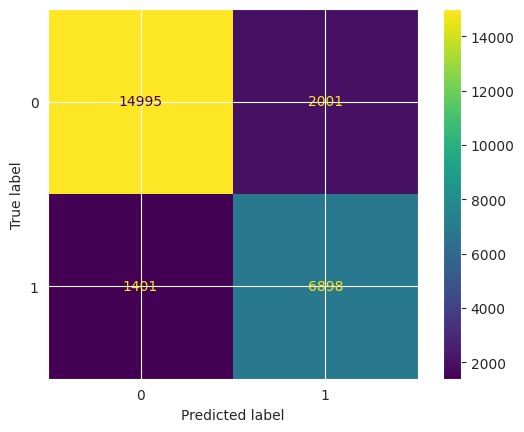

In [ ]:
cm = confusion_matrix(y_train, y_train_predict)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels=dt_model_tuned_1.classes_
)
disp.plot()
plt.show()

In [ ]:
dt_model_tuned_1_perf_train = model_performance(
dt_model_tuned_1, X_train, y_train
)
dt_model_tuned_1_perf_train



Accuracy    Recall  Precision        F1
0  0.865507  0.831184   0.775143  0.802186

####Checking pre-pruned Decision Tree Classifier performance on test set

In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      7299
           1       0.76      0.81      0.79      3542

    accuracy                           0.86     10841
   macro avg       0.83      0.84      0.84     10841
weighted avg       0.86      0.86      0.86     10841



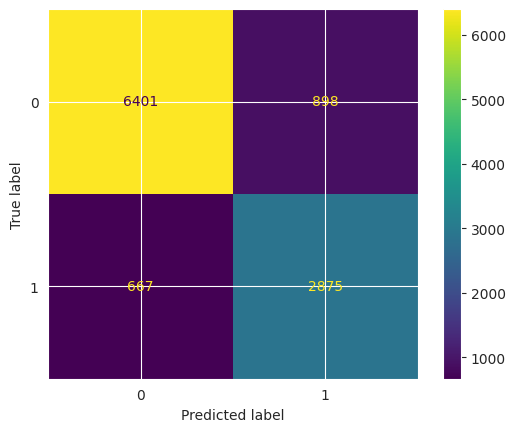

In [ ]:
cm = confusion_matrix(y_test, y_test_predict)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels=dt_model_tuned_1.classes_
)
disp.plot()
plt.show()

In [ ]:
dt_model_tuned_1_perf_test = model_performance(
dt_model_tuned_1, X_test, y_test
)
dt_model_tuned_1_perf_test



Accuracy    Recall  Precision        F1
0  0.855641  0.811688   0.761993  0.786056

#### Actionable Insights and Recommendations
* Lead time, Average price per room, No of Special Requests, Market segment type Online and Arrival Month have a significant impact on booking cancellation
* Dynamic pricing model used to determine average price per room has to be reviewed to take into account the busiest months
* Repeat customers form an important segment and should be harnessed in terms of average pricing
* Review of the average price for corporate segment should be done given the consistency of their bookings
* Bookings during the busiest month should include a surcharge which is nonrefundable
* The busiest months of 8 to 11 should have a fixed room price which would smooth over fluctuation in the less busy months
* Return customers should have a loyalty program to ensure rewards for repeat visits

